In [1]:
!pip install optuna yfinance umap statsmodels

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 61.6 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 85.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.9/507.9 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 15.8 MB/s eta 0:00:00
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=e873cae63de8e3267f76cac383ea466c006fe6137262c76759e12683d8a33be2
  Stored in directory:

In [ ]:
'''This cell runs the implemented model with some specified inputs'''
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.data_processing import fetch_data, calculate_technical_indicators
from utils.evaluation import walk_forward_validation
from models.cnnlstmtrans_model_wrapper import CNNLSTMTransformerModelWrapper
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.data_processing import prepare_data
import yfinance as yf
from models.base_model import BaseModel
from models.xgboost_model_wrapper import XGBModelWrapper
from models.rnn_model_wrapper import RNNModelWrapper

from models.linear_model_wrapper import LinearRegressionModelWrapper
start_date = '2000-01-01'
end_date = '2019-12-31'
ticker = 'ALL' 
other_tick = [
    'GM', 'UNH', 'JNJ', 'PG', 'XOM', 'TGT', 'DIS', 'AAPL',
    'MCD', 'MSFT', 'HD', 'KO', 'PEP', 'INTC', 'CMCSA', 'VZ', 'AMZN', 'F',
    'GOOGL', 'GE', 'NFLX', 'MRK', 'PFE', 'T', 'BA', 'UPS', 'FDX',
    'LLY', 'ORCL', 'NVDA', 'CSCO', 'SBUX', 'COST', 'NKE', 'C',
    'BAC', 'GS', 'BLK', 'AMGN', 'MO', 'COP', 'RTX', 'NEE', 'QCOM', 'CVX',
    'META', 'LOW', 'CAT', 'MDT', 'ELV', 'DHR', 'MMM', 'HON', 'V', 'LMT',
    'INTU', 'MDLZ', 'ADP', 'TXN', 'APD', 'TMO', 'DUK', 'SO', 'AEP', 'SPG',
    'SCHW', 'SYK', 'CCI', 'EXC', 'EQIX', 'PSX', 'NEM', 'PRU', 'ALL', 'BDX',
    'PNC', 'USB', 'BKNG', 'SHW', 'NSC', 'WELL', 'CMG', 'VFC', 'MCO', 'HCA',
    'KMB', 'A', 'STZ', 'DFS', 'OXY', 'DAL', 'WBA', 'LUV', 'D', 'MAR', 'AIZ',
    'TWTR', 'CE', 'TEL', 'OKE', 'MSI', 'ZBH', 'ABT', 'AMP', 'MS', 'BSX',
    'BAX', 'LNC', 'GLW', 'WDC', 'ITW', 'TSCO', 'ROP', 'GWW', 'FLT', 'FTNT',
    'TROW', 'FIS', 'JCI', 'LHX', 'NWL', 'EA', 'CLX', 'AZO', 'MKC',
    'HIG', 'ROK', 'FFIV', 'ALLE', 'VRSK', 'UAL', 'APTV', 'CB', 'WLTW', 'AIG',
    'KEYS', 'PFG', 'EW', 'CARR', 'DVA', 'EIX', 'AMT', 'CMI', 'AEE', 'AFL',
    'AVB', 'NDAQ', 'GL', 'DRE', 'AES', 'SNA', 'HLT', 'CNP', 'WMB', 'OKE',
    'ANET', 'ED', 'CINF', 'APH', 'URI', 'EXR', 'KIM', 'BEN', 'IP', 'TYL',
    'STE', 'CL', 'DPZ', 'RF', 'NTAP', 'DFS', 'AJG', 'ZION', 'XRX', 'COO',
    'K', 'SIVB', 'BBY', 'MPC', 'DGX', 'HRL', 'MLM', 'MRO', 'DISH', 'AES',
    'RMD', 'IRM', 'CTXS', 'PWR', 'HST', 'ALB', 'YUM', 'NUE', 'RL', 'GPN',
    'ROL', 'WEC', 'EXPD', 'HSY', 'VMC', 'GRMN', 'FDS', 'CAG', 'AZPN',
    'GPC', 'CME', 'IQV', 'WRB', 'AVY', 'TTC', 'OTIS', 'HRC', 'DG', 'VTR',
    'BRO', 'CPB', 'SJM', 'DRI', 'CHD', 'SLG', 'IRM', 'SIRI', 'STX', 'BWA',
    'PPL', 'CPT', 'ESS', 'PENN', 'SUI', 'ODFL', 'BKH', 'NVAX', 'ROG', 'RPM',
    'UNM', 'SCI', 'NI', 'BERY', 'GNTX', 'OMC', 'IPG', 'MATX', 'AOS', 'FMC',
    'ALLE', 'KSS', 'FHN', 'GME', 'AER', 'JBL', 'STAG', 'OKE', 'VIAC', 'PXD',
    'WHR', 'OLN', 'GT', 'NRG', 'TMUS', 'WU', 'CSL', 'BXP', 'CPRT', 'CAR',
    'MHK', 'WH', 'MPW', 'SHOO', 'MODV', 'MTW', 'JBHT', 'ROL', 'BLDR', 'XYL',
    'SEE', 'WAT', 'XPO', 'CHRW', 'DKS', 'ATO', 'WTW', 'DYN', 'MAT', 'HOLX',
    'CACC', 'SAIA', 'TAP', 'OC', 'FCX', 'SHY', 'NBL', 'SON', 'PK', 'SRCL',
    'CZR', 'MAS', 'DNKN', 'AVTR', 'CUBE', 'RJF', 'AGCO', 'POST', 'ITCI',
    'PBH', 'M', 'PDCE', 'GVA', 'RAMP', 'CRS', 'PEN', 'DXC', 'STL', 'WK',
    'UFPI', 'SEE', 'HRB', 'WAFD', 'OLP', 'ELF', 'SEIC', 'COHR', 'KBR',
    'AIRC', 'POWI', 'ACIW', 'HOMB', 'RAMP', 'PRGO', 'PTEN', 'ENTA', 'HAIN',
    'HNI', 'KLIC', 'HUBS', 'AFRM', 'AVYA', 'MDP', 'CIR', 'PRA', 'SPPI',
    'NEWR', 'VAPO', 'LANC', 'LPX', 'TGNA', 'ESI', 'SSYS', 'SMAR', 'REYN',
    'COHR', 'OMF', 'HI', 'KMT', 'PEN', 'JNPR', 'EGHT', 'SONO', 'UBSI',
    'RYTM', 'INSP', 'GHLD', 'BIVI', 'ZY', 'ALKS', 'FDX', 'DLR', 'TGT',
    'EXPE', 'SNAP', 'PTON', 'PGR', 'ALNY', 'DOX', 'TDY', 'TDOC', 'SBUX',
    'BE', 'BMY', 'ISRG', 'PINS', 'ATNX', 'ES', 'GLW', 'RRC', 'ZION', 'PLUG',
    'RDN', 'BKI', 'ALK', 'CF', 'DDOG', 'CBRE', 'SLF', 'OHI', 'JPM', 'DOV'
]


model = RNNModelWrapper(
    target_ticker=ticker,
    other_tickers=other_tick,
    start_date=start_date,
    end_date=end_date,
    init_train_perc=0.8,
    min_steps_per_retune=250,
    is_regressive=True,
    max_n_correlated_stocks=10,
    num_trials_per_tuning = 100,
    max_num_features=100
)


walk_forward_validation(model)


[I 2025-02-25 18:14:00,602] A new study created in memory with name: no-name-b2da3dcb-1ec9-41ce-aeab-ae1b4494f373
[I 2025-02-25 18:14:01,701] Trial 0 finished with value: 1.0366942899505092 and parameters: {'window': 26}. Best is trial 0 with value: 1.0366942899505092.
[I 2025-02-25 18:14:03,195] Trial 1 finished with value: 1.021149509842059 and parameters: {'window': 21}. Best is trial 0 with value: 1.0366942899505092.
[I 2025-02-25 18:14:04,173] Trial 2 finished with value: 1.0304230199808684 and parameters: {'window': 8}. Best is trial 0 with value: 1.0366942899505092.
[I 2025-02-25 18:14:05,242] Trial 3 finished with value: 1.0126004354848275 and parameters: {'window': 9}. Best is trial 0 with value: 1.0366942899505092.
[I 2025-02-25 18:14:06,160] Trial 4 finished with value: 1.0305284885060177 and parameters: {'window': 38}. Best is trial 0 with value: 1.0366942899505092.
[I 2025-02-25 18:14:07,092] Trial 5 finished with value: 1.0153275648470124 and parameters: {'window': 40}. B

Retuning on 466 samples: Best window = 27, Best performance = 1.0496


[I 2025-02-25 18:14:25,505] A new study created in memory with name: no-name-9d8521e9-6f49-4c8f-a655-1fc8517ddec9
[I 2025-02-25 18:14:26,627] Trial 0 finished with value: 1.0256115917917197 and parameters: {'window': 5}. Best is trial 0 with value: 1.0256115917917197.
[I 2025-02-25 18:14:27,687] Trial 1 finished with value: 1.0307750423330124 and parameters: {'window': 14}. Best is trial 1 with value: 1.0307750423330124.
[I 2025-02-25 18:14:28,705] Trial 2 finished with value: 1.0399957129367434 and parameters: {'window': 44}. Best is trial 2 with value: 1.0399957129367434.
[I 2025-02-25 18:14:29,833] Trial 3 finished with value: 1.0453524113332187 and parameters: {'window': 23}. Best is trial 3 with value: 1.0453524113332187.
[I 2025-02-25 18:14:30,894] Trial 4 finished with value: 1.0242280034398443 and parameters: {'window': 11}. Best is trial 3 with value: 1.0453524113332187.
[I 2025-02-25 18:14:31,858] Trial 5 finished with value: 1.0190302409481222 and parameters: {'window': 38}.

Retuning on 496 samples: Best window = 24, Best performance = 1.0456


[I 2025-02-25 18:14:51,559] A new study created in memory with name: no-name-e26564cd-1763-44e2-8197-60f4a96c76c1
[I 2025-02-25 18:14:52,798] Trial 0 finished with value: 1.0218401909830106 and parameters: {'window': 49}. Best is trial 0 with value: 1.0218401909830106.
[I 2025-02-25 18:14:53,895] Trial 1 finished with value: 0.9964138197769368 and parameters: {'window': 39}. Best is trial 0 with value: 1.0218401909830106.
[I 2025-02-25 18:14:54,946] Trial 2 finished with value: 1.0281124091989975 and parameters: {'window': 48}. Best is trial 2 with value: 1.0281124091989975.
[I 2025-02-25 18:14:56,001] Trial 3 finished with value: 1.0199417252668423 and parameters: {'window': 5}. Best is trial 2 with value: 1.0281124091989975.
[I 2025-02-25 18:14:57,053] Trial 4 finished with value: 1.0114097465371323 and parameters: {'window': 17}. Best is trial 2 with value: 1.0281124091989975.
[I 2025-02-25 18:14:58,149] Trial 5 finished with value: 1.0119860302824915 and parameters: {'window': 18}.

Retuning on 526 samples: Best window = 23, Best performance = 1.0369


[I 2025-02-25 18:15:21,299] A new study created in memory with name: no-name-7a7b0bff-8b2e-4018-9209-d2e762c82c8b
[I 2025-02-25 18:15:22,554] Trial 0 finished with value: 1.0024065065600887 and parameters: {'window': 18}. Best is trial 0 with value: 1.0024065065600887.
[I 2025-02-25 18:15:24,112] Trial 1 finished with value: 1.0310618255300967 and parameters: {'window': 23}. Best is trial 1 with value: 1.0310618255300967.
[I 2025-02-25 18:15:25,434] Trial 2 finished with value: 1.015367671722752 and parameters: {'window': 4}. Best is trial 1 with value: 1.0310618255300967.
[I 2025-02-25 18:15:26,918] Trial 3 finished with value: 0.9904304167075555 and parameters: {'window': 36}. Best is trial 1 with value: 1.0310618255300967.
[I 2025-02-25 18:15:28,419] Trial 4 finished with value: 1.01682663806856 and parameters: {'window': 5}. Best is trial 1 with value: 1.0310618255300967.
[I 2025-02-25 18:15:29,792] Trial 5 finished with value: 0.9986202504724465 and parameters: {'window': 11}. Bes

Retuning on 556 samples: Best window = 23, Best performance = 1.0311


[I 2025-02-25 18:15:56,545] A new study created in memory with name: no-name-40617d4a-4cd4-4f39-9611-a56a5c56b0d4
[I 2025-02-25 18:15:58,296] Trial 0 finished with value: 1.0195374055776096 and parameters: {'window': 25}. Best is trial 0 with value: 1.0195374055776096.
[I 2025-02-25 18:15:59,917] Trial 1 finished with value: 1.0288935197079871 and parameters: {'window': 48}. Best is trial 1 with value: 1.0288935197079871.
[I 2025-02-25 18:16:01,571] Trial 2 finished with value: 1.0076150294616368 and parameters: {'window': 14}. Best is trial 1 with value: 1.0288935197079871.
[I 2025-02-25 18:16:03,202] Trial 3 finished with value: 1.0073116982970434 and parameters: {'window': 3}. Best is trial 1 with value: 1.0288935197079871.
[I 2025-02-25 18:16:04,778] Trial 4 finished with value: 1.0138142167740232 and parameters: {'window': 50}. Best is trial 1 with value: 1.0288935197079871.
[I 2025-02-25 18:16:06,488] Trial 5 finished with value: 1.018077005187938 and parameters: {'window': 13}. 

Retuning on 586 samples: Best window = 44, Best performance = 1.0422


[I 2025-02-25 18:16:36,120] A new study created in memory with name: no-name-8f90bd9b-56b9-41d2-94cf-2b0a87813a1d
[I 2025-02-25 18:16:37,540] Trial 0 finished with value: 1.0225292816332925 and parameters: {'window': 43}. Best is trial 0 with value: 1.0225292816332925.
[I 2025-02-25 18:16:39,081] Trial 1 finished with value: 1.003058188384715 and parameters: {'window': 17}. Best is trial 0 with value: 1.0225292816332925.
[I 2025-02-25 18:16:40,864] Trial 2 finished with value: 0.9952620204336338 and parameters: {'window': 47}. Best is trial 0 with value: 1.0225292816332925.
[I 2025-02-25 18:16:42,309] Trial 3 finished with value: 1.049144157858948 and parameters: {'window': 2}. Best is trial 3 with value: 1.049144157858948.
[I 2025-02-25 18:16:43,799] Trial 4 finished with value: 1.0183212038266998 and parameters: {'window': 42}. Best is trial 3 with value: 1.049144157858948.
[I 2025-02-25 18:16:45,158] Trial 5 finished with value: 0.9808405039137387 and parameters: {'window': 8}. Best

Retuning on 616 samples: Best window = 2, Best performance = 1.0491


[I 2025-02-25 18:17:15,705] A new study created in memory with name: no-name-f3c202a2-dca2-4a00-8db6-faa1583a74c9
[I 2025-02-25 18:17:17,382] Trial 0 finished with value: 0.9983218958345322 and parameters: {'window': 1}. Best is trial 0 with value: 0.9983218958345322.
[I 2025-02-25 18:17:19,053] Trial 1 finished with value: 0.9955940506904039 and parameters: {'window': 47}. Best is trial 0 with value: 0.9983218958345322.
[I 2025-02-25 18:17:20,543] Trial 2 finished with value: 0.9912705160561124 and parameters: {'window': 18}. Best is trial 0 with value: 0.9983218958345322.
[I 2025-02-25 18:17:22,446] Trial 3 finished with value: 1.0069828442265643 and parameters: {'window': 29}. Best is trial 3 with value: 1.0069828442265643.
[I 2025-02-25 18:17:24,050] Trial 4 finished with value: 1.0023250677100097 and parameters: {'window': 22}. Best is trial 3 with value: 1.0069828442265643.
[I 2025-02-25 18:17:26,002] Trial 5 finished with value: 1.0164608543146483 and parameters: {'window': 42}.

Retuning on 646 samples: Best window = 27, Best performance = 1.0330


[I 2025-02-25 18:17:57,708] A new study created in memory with name: no-name-678f5a38-de6a-4d48-bd0b-30e3364dbeff
[I 2025-02-25 18:17:59,684] Trial 0 finished with value: 0.9877770583989418 and parameters: {'window': 39}. Best is trial 0 with value: 0.9877770583989418.
[I 2025-02-25 18:18:01,443] Trial 1 finished with value: 1.0305159534510995 and parameters: {'window': 43}. Best is trial 1 with value: 1.0305159534510995.
[I 2025-02-25 18:18:03,287] Trial 2 finished with value: 0.9662049261171173 and parameters: {'window': 10}. Best is trial 1 with value: 1.0305159534510995.
[I 2025-02-25 18:18:05,214] Trial 3 finished with value: 1.0214293006911537 and parameters: {'window': 49}. Best is trial 1 with value: 1.0305159534510995.
[I 2025-02-25 18:18:07,070] Trial 4 finished with value: 0.9998326122704009 and parameters: {'window': 5}. Best is trial 1 with value: 1.0305159534510995.
[I 2025-02-25 18:18:08,653] Trial 5 finished with value: 1.0058231105549211 and parameters: {'window': 30}.

Retuning on 676 samples: Best window = 45, Best performance = 1.0371


[I 2025-02-25 18:18:38,637] A new study created in memory with name: no-name-4f69ad13-04d2-4276-80e9-c7579ba7825a
[I 2025-02-25 18:18:40,353] Trial 0 finished with value: 0.9890639922932396 and parameters: {'window': 39}. Best is trial 0 with value: 0.9890639922932396.
[I 2025-02-25 18:18:42,064] Trial 1 finished with value: 0.974572564947473 and parameters: {'window': 14}. Best is trial 0 with value: 0.9890639922932396.
[I 2025-02-25 18:18:43,694] Trial 2 finished with value: 1.0024067898098505 and parameters: {'window': 28}. Best is trial 2 with value: 1.0024067898098505.
[I 2025-02-25 18:18:45,377] Trial 3 finished with value: 1.0024067898098505 and parameters: {'window': 28}. Best is trial 2 with value: 1.0024067898098505.
[I 2025-02-25 18:18:47,315] Trial 4 finished with value: 0.9980222154073968 and parameters: {'window': 16}. Best is trial 2 with value: 1.0024067898098505.
[I 2025-02-25 18:18:49,113] Trial 5 finished with value: 0.9862404916820434 and parameters: {'window': 36}.

Retuning on 706 samples: Best window = 44, Best performance = 1.0424


[I 2025-02-25 18:19:23,925] A new study created in memory with name: no-name-00c6d6c5-75c1-4128-834b-7886e35659c1
[I 2025-02-25 18:19:25,873] Trial 0 finished with value: 1.0195619781721394 and parameters: {'window': 31}. Best is trial 0 with value: 1.0195619781721394.
[I 2025-02-25 18:19:27,927] Trial 1 finished with value: 1.0197086211811972 and parameters: {'window': 15}. Best is trial 1 with value: 1.0197086211811972.
[I 2025-02-25 18:19:29,646] Trial 2 finished with value: 1.013522409862065 and parameters: {'window': 17}. Best is trial 1 with value: 1.0197086211811972.
[I 2025-02-25 18:19:31,672] Trial 3 finished with value: 0.9472308992655588 and parameters: {'window': 21}. Best is trial 1 with value: 1.0197086211811972.
[I 2025-02-25 18:19:33,446] Trial 4 finished with value: 0.983683564689626 and parameters: {'window': 39}. Best is trial 1 with value: 1.0197086211811972.
[I 2025-02-25 18:19:35,263] Trial 5 finished with value: 0.983953535281174 and parameters: {'window': 38}. B

Retuning on 736 samples: Best window = 2, Best performance = 1.0807


[I 2025-02-25 18:20:13,686] A new study created in memory with name: no-name-099bb9f4-fdc0-47c9-a82f-f745cc0e4fed
[I 2025-02-25 18:20:15,724] Trial 0 finished with value: 1.0915076321075112 and parameters: {'window': 2}. Best is trial 0 with value: 1.0915076321075112.
[I 2025-02-25 18:20:17,541] Trial 1 finished with value: 1.0172412536683035 and parameters: {'window': 47}. Best is trial 0 with value: 1.0915076321075112.
[I 2025-02-25 18:20:19,275] Trial 2 finished with value: 1.0077681972195447 and parameters: {'window': 18}. Best is trial 0 with value: 1.0915076321075112.
[I 2025-02-25 18:20:20,947] Trial 3 finished with value: 1.0146279231523452 and parameters: {'window': 15}. Best is trial 0 with value: 1.0915076321075112.
[I 2025-02-25 18:20:22,564] Trial 4 finished with value: 1.0227044219603025 and parameters: {'window': 46}. Best is trial 0 with value: 1.0915076321075112.
[I 2025-02-25 18:20:24,363] Trial 5 finished with value: 1.0042038659202972 and parameters: {'window': 40}.

Retuning on 766 samples: Best window = 2, Best performance = 1.0915


[I 2025-02-25 18:20:59,152] A new study created in memory with name: no-name-4b12a938-6308-40f1-b581-a874dd70167f
[I 2025-02-25 18:21:00,932] Trial 0 finished with value: 1.0118084259090732 and parameters: {'window': 29}. Best is trial 0 with value: 1.0118084259090732.
[I 2025-02-25 18:21:02,674] Trial 1 finished with value: 1.0041943073807162 and parameters: {'window': 46}. Best is trial 0 with value: 1.0118084259090732.
[I 2025-02-25 18:21:04,436] Trial 2 finished with value: 1.0256321057516833 and parameters: {'window': 1}. Best is trial 2 with value: 1.0256321057516833.
[I 2025-02-25 18:21:06,518] Trial 3 finished with value: 0.9975116534558495 and parameters: {'window': 41}. Best is trial 2 with value: 1.0256321057516833.
[I 2025-02-25 18:21:08,907] Trial 4 finished with value: 1.0055277408080787 and parameters: {'window': 47}. Best is trial 2 with value: 1.0256321057516833.
[I 2025-02-25 18:21:11,046] Trial 5 finished with value: 1.0118084259090732 and parameters: {'window': 29}.

Retuning on 796 samples: Best window = 2, Best performance = 1.0814


[I 2025-02-25 18:21:46,077] A new study created in memory with name: no-name-c83e717e-c0f5-4849-bd05-a252f3cf4404
[I 2025-02-25 18:21:48,341] Trial 0 finished with value: 1.0075717362094005 and parameters: {'window': 45}. Best is trial 0 with value: 1.0075717362094005.
[I 2025-02-25 18:21:50,208] Trial 1 finished with value: 0.9979478732551905 and parameters: {'window': 5}. Best is trial 0 with value: 1.0075717362094005.
[I 2025-02-25 18:21:52,226] Trial 2 finished with value: 1.012854599146712 and parameters: {'window': 15}. Best is trial 2 with value: 1.012854599146712.
[I 2025-02-25 18:21:54,118] Trial 3 finished with value: 1.0032424952963461 and parameters: {'window': 26}. Best is trial 2 with value: 1.012854599146712.
[I 2025-02-25 18:21:56,390] Trial 4 finished with value: 0.9982428988906467 and parameters: {'window': 28}. Best is trial 2 with value: 1.012854599146712.
[I 2025-02-25 18:21:58,346] Trial 5 finished with value: 0.9923435460424767 and parameters: {'window': 35}. Bes

Retuning on 826 samples: Best window = 2, Best performance = 1.0746


[I 2025-02-25 18:22:33,656] A new study created in memory with name: no-name-0e49afd5-1063-4659-bb23-7bf7757549b8
[I 2025-02-25 18:22:35,481] Trial 0 finished with value: 1.0068517209718344 and parameters: {'window': 4}. Best is trial 0 with value: 1.0068517209718344.
[I 2025-02-25 18:22:37,405] Trial 1 finished with value: 1.010403377250086 and parameters: {'window': 46}. Best is trial 1 with value: 1.010403377250086.
[I 2025-02-25 18:22:39,229] Trial 2 finished with value: 0.9989830420735182 and parameters: {'window': 24}. Best is trial 1 with value: 1.010403377250086.
[I 2025-02-25 18:22:40,994] Trial 3 finished with value: 0.9990869591277465 and parameters: {'window': 6}. Best is trial 1 with value: 1.010403377250086.
[I 2025-02-25 18:22:42,883] Trial 4 finished with value: 1.007821795713871 and parameters: {'window': 45}. Best is trial 1 with value: 1.010403377250086.
[I 2025-02-25 18:22:44,703] Trial 5 finished with value: 0.9738802515557753 and parameters: {'window': 34}. Best i

Retuning on 856 samples: Best window = 48, Best performance = 1.0366


[I 2025-02-25 18:23:24,862] A new study created in memory with name: no-name-7ca5e96b-63f4-4a06-a22d-6d27c3a74abc
[I 2025-02-25 18:23:26,745] Trial 0 finished with value: 0.9939685302661347 and parameters: {'window': 41}. Best is trial 0 with value: 0.9939685302661347.
[I 2025-02-25 18:23:28,620] Trial 1 finished with value: 0.989257874277496 and parameters: {'window': 19}. Best is trial 0 with value: 0.9939685302661347.
[I 2025-02-25 18:23:30,731] Trial 2 finished with value: 0.9588565823463217 and parameters: {'window': 39}. Best is trial 0 with value: 0.9939685302661347.
[I 2025-02-25 18:23:32,501] Trial 3 finished with value: 1.064058811537954 and parameters: {'window': 2}. Best is trial 3 with value: 1.064058811537954.
[I 2025-02-25 18:23:34,298] Trial 4 finished with value: 0.9696556491537575 and parameters: {'window': 11}. Best is trial 3 with value: 1.064058811537954.
[I 2025-02-25 18:23:36,422] Trial 5 finished with value: 0.9792112306106604 and parameters: {'window': 35}. Bes

Retuning on 872 samples: Best window = 2, Best performance = 1.0641


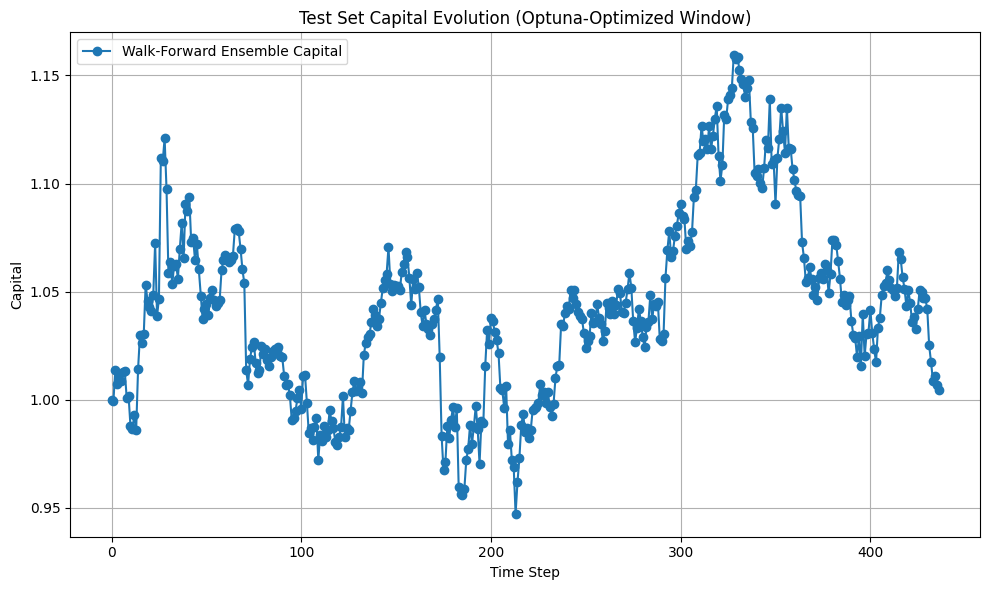

[I 2025-02-25 18:24:15,783] A new study created in memory with name: no-name-575d23d3-bdce-41f2-afbe-a523318ab468


Saved updated file with ensemble predictions to: /notebooks/ticker_results/all_merged_ensemble.csv


[I 2025-02-25 18:24:16,833] Trial 0 finished with value: 1.022523902081421 and parameters: {'window': 9}. Best is trial 0 with value: 1.022523902081421.
[I 2025-02-25 18:24:17,847] Trial 1 finished with value: 1.022523902081421 and parameters: {'window': 9}. Best is trial 0 with value: 1.022523902081421.
[I 2025-02-25 18:24:18,934] Trial 2 finished with value: 1.0249222756316143 and parameters: {'window': 6}. Best is trial 2 with value: 1.0249222756316143.
[I 2025-02-25 18:24:20,249] Trial 3 finished with value: 1.0356449157252328 and parameters: {'window': 32}. Best is trial 3 with value: 1.0356449157252328.
[I 2025-02-25 18:24:21,631] Trial 4 finished with value: 1.0080410913610902 and parameters: {'window': 16}. Best is trial 3 with value: 1.0356449157252328.
[I 2025-02-25 18:24:22,663] Trial 5 finished with value: 1.0113333231239756 and parameters: {'window': 2}. Best is trial 3 with value: 1.0356449157252328.
[I 2025-02-25 18:24:23,643] Trial 6 finished with value: 1.0089044715015

Retuning on 483 samples: Best window = 32, Best performance = 1.0356


[I 2025-02-25 18:24:44,337] A new study created in memory with name: no-name-6dc4699d-e961-46fe-841a-8d57782e91e8
[I 2025-02-25 18:24:45,587] Trial 0 finished with value: 1.0426142547840516 and parameters: {'window': 23}. Best is trial 0 with value: 1.0426142547840516.
[I 2025-02-25 18:24:46,832] Trial 1 finished with value: 1.0381394965120831 and parameters: {'window': 15}. Best is trial 0 with value: 1.0426142547840516.
[I 2025-02-25 18:24:47,942] Trial 2 finished with value: 1.0115646703445786 and parameters: {'window': 2}. Best is trial 0 with value: 1.0426142547840516.
[I 2025-02-25 18:24:49,051] Trial 3 finished with value: 1.009950460424031 and parameters: {'window': 42}. Best is trial 0 with value: 1.0426142547840516.
[I 2025-02-25 18:24:50,179] Trial 4 finished with value: 1.0381394965120831 and parameters: {'window': 15}. Best is trial 0 with value: 1.0426142547840516.
[I 2025-02-25 18:24:51,354] Trial 5 finished with value: 1.0633185169101422 and parameters: {'window': 33}. 

Retuning on 513 samples: Best window = 33, Best performance = 1.0633


[I 2025-02-25 18:25:12,651] A new study created in memory with name: no-name-780bb942-0adb-48e2-858b-cf28c2be350e
[I 2025-02-25 18:25:13,763] Trial 0 finished with value: 1.0420702380717912 and parameters: {'window': 23}. Best is trial 0 with value: 1.0420702380717912.
[I 2025-02-25 18:25:14,930] Trial 1 finished with value: 1.0345976769317031 and parameters: {'window': 11}. Best is trial 0 with value: 1.0420702380717912.
[I 2025-02-25 18:25:16,050] Trial 2 finished with value: 1.0297021818246361 and parameters: {'window': 2}. Best is trial 0 with value: 1.0420702380717912.
[I 2025-02-25 18:25:17,352] Trial 3 finished with value: 1.061224746871273 and parameters: {'window': 6}. Best is trial 3 with value: 1.061224746871273.
[I 2025-02-25 18:25:18,719] Trial 4 finished with value: 1.0309313126657067 and parameters: {'window': 7}. Best is trial 3 with value: 1.061224746871273.
[I 2025-02-25 18:25:19,966] Trial 5 finished with value: 1.0229575106977282 and parameters: {'window': 41}. Best

Retuning on 543 samples: Best window = 6, Best performance = 1.0612


[I 2025-02-25 18:25:45,449] A new study created in memory with name: no-name-e3555f9a-3164-4a7d-9765-a3ce255cef14
[I 2025-02-25 18:25:46,805] Trial 0 finished with value: 1.0581277609721575 and parameters: {'window': 32}. Best is trial 0 with value: 1.0581277609721575.
[I 2025-02-25 18:25:48,218] Trial 1 finished with value: 1.0319432531816966 and parameters: {'window': 25}. Best is trial 0 with value: 1.0581277609721575.
[I 2025-02-25 18:25:49,557] Trial 2 finished with value: 1.0232465854691264 and parameters: {'window': 46}. Best is trial 0 with value: 1.0581277609721575.
[I 2025-02-25 18:25:50,917] Trial 3 finished with value: 1.0319432531816966 and parameters: {'window': 25}. Best is trial 0 with value: 1.0581277609721575.
[I 2025-02-25 18:25:52,329] Trial 4 finished with value: 1.0722314197589666 and parameters: {'window': 14}. Best is trial 4 with value: 1.0722314197589666.
[I 2025-02-25 18:25:53,731] Trial 5 finished with value: 1.0078750877370373 and parameters: {'window': 42}

Retuning on 573 samples: Best window = 14, Best performance = 1.0722


[I 2025-02-25 18:26:19,640] A new study created in memory with name: no-name-d0ee91ba-a005-41ba-891e-b570c545d56a
[I 2025-02-25 18:26:21,109] Trial 0 finished with value: 1.0214614631468948 and parameters: {'window': 48}. Best is trial 0 with value: 1.0214614631468948.
[I 2025-02-25 18:26:22,548] Trial 1 finished with value: 1.0219617397535257 and parameters: {'window': 39}. Best is trial 1 with value: 1.0219617397535257.
[I 2025-02-25 18:26:23,966] Trial 2 finished with value: 1.053770502923339 and parameters: {'window': 18}. Best is trial 2 with value: 1.053770502923339.
[I 2025-02-25 18:26:25,466] Trial 3 finished with value: 1.0093067710735495 and parameters: {'window': 36}. Best is trial 2 with value: 1.053770502923339.
[I 2025-02-25 18:26:27,195] Trial 4 finished with value: 1.0271020465555925 and parameters: {'window': 3}. Best is trial 2 with value: 1.053770502923339.
[I 2025-02-25 18:26:28,663] Trial 5 finished with value: 1.0344606323094312 and parameters: {'window': 46}. Bes

Retuning on 603 samples: Best window = 5, Best performance = 1.0817


[I 2025-02-25 18:26:54,370] A new study created in memory with name: no-name-2e3b4f9a-f0e7-4f86-8cec-bdfa6004ba70
[I 2025-02-25 18:26:55,891] Trial 0 finished with value: 1.0226623010569114 and parameters: {'window': 30}. Best is trial 0 with value: 1.0226623010569114.
[I 2025-02-25 18:26:57,397] Trial 1 finished with value: 1.0222831837928015 and parameters: {'window': 42}. Best is trial 0 with value: 1.0226623010569114.
[I 2025-02-25 18:26:58,849] Trial 2 finished with value: 1.0396792631783065 and parameters: {'window': 7}. Best is trial 2 with value: 1.0396792631783065.
[I 2025-02-25 18:27:00,243] Trial 3 finished with value: 1.0467886674701048 and parameters: {'window': 37}. Best is trial 3 with value: 1.0467886674701048.
[I 2025-02-25 18:27:01,667] Trial 4 finished with value: 1.0795382605273212 and parameters: {'window': 6}. Best is trial 4 with value: 1.0795382605273212.
[I 2025-02-25 18:27:03,215] Trial 5 finished with value: 1.0222831837928015 and parameters: {'window': 42}. 

Retuning on 633 samples: Best window = 19, Best performance = 1.0875


[I 2025-02-25 18:27:32,085] A new study created in memory with name: no-name-c5844ced-bb4c-4e4c-9413-4d1cb042dc71
[I 2025-02-25 18:27:33,452] Trial 0 finished with value: 1.0059468688981323 and parameters: {'window': 44}. Best is trial 0 with value: 1.0059468688981323.
[I 2025-02-25 18:27:34,913] Trial 1 finished with value: 0.9886400404678357 and parameters: {'window': 48}. Best is trial 0 with value: 1.0059468688981323.
[I 2025-02-25 18:27:36,350] Trial 2 finished with value: 1.051816679072198 and parameters: {'window': 9}. Best is trial 2 with value: 1.051816679072198.
[I 2025-02-25 18:27:37,749] Trial 3 finished with value: 1.0621850013802963 and parameters: {'window': 33}. Best is trial 3 with value: 1.0621850013802963.
[I 2025-02-25 18:27:39,067] Trial 4 finished with value: 1.0094708429525414 and parameters: {'window': 12}. Best is trial 3 with value: 1.0621850013802963.
[I 2025-02-25 18:27:40,466] Trial 5 finished with value: 0.9983944790841652 and parameters: {'window': 49}. B

Retuning on 663 samples: Best window = 33, Best performance = 1.0622


[I 2025-02-25 18:28:08,365] A new study created in memory with name: no-name-0a309ab7-c208-45fb-9a4d-f0e26a6fe9b0
[I 2025-02-25 18:28:09,972] Trial 0 finished with value: 1.050875914354402 and parameters: {'window': 9}. Best is trial 0 with value: 1.050875914354402.
[I 2025-02-25 18:28:11,460] Trial 1 finished with value: 1.0427124202638196 and parameters: {'window': 3}. Best is trial 0 with value: 1.050875914354402.
[I 2025-02-25 18:28:13,032] Trial 2 finished with value: 1.0362358460867198 and parameters: {'window': 1}. Best is trial 0 with value: 1.050875914354402.
[I 2025-02-25 18:28:14,502] Trial 3 finished with value: 1.0040326771982335 and parameters: {'window': 30}. Best is trial 0 with value: 1.050875914354402.
[I 2025-02-25 18:28:15,970] Trial 4 finished with value: 1.0442084864326409 and parameters: {'window': 31}. Best is trial 0 with value: 1.050875914354402.
[I 2025-02-25 18:28:17,409] Trial 5 finished with value: 0.9918152208710008 and parameters: {'window': 44}. Best is

Retuning on 693 samples: Best window = 6, Best performance = 1.0597


[I 2025-02-25 18:28:47,408] A new study created in memory with name: no-name-8661e7c7-2029-4264-8c5e-98f215baef0b
[I 2025-02-25 18:28:49,206] Trial 0 finished with value: 1.014522686439395 and parameters: {'window': 41}. Best is trial 0 with value: 1.014522686439395.
[I 2025-02-25 18:28:50,863] Trial 1 finished with value: 0.9697459549457491 and parameters: {'window': 4}. Best is trial 0 with value: 1.014522686439395.
[I 2025-02-25 18:28:52,716] Trial 2 finished with value: 1.015892715535713 and parameters: {'window': 18}. Best is trial 2 with value: 1.015892715535713.
[I 2025-02-25 18:28:54,423] Trial 3 finished with value: 0.9882460481289439 and parameters: {'window': 49}. Best is trial 2 with value: 1.015892715535713.
[I 2025-02-25 18:28:56,150] Trial 4 finished with value: 1.0050982656258816 and parameters: {'window': 37}. Best is trial 2 with value: 1.015892715535713.
[I 2025-02-25 18:28:57,723] Trial 5 finished with value: 1.0158307461010487 and parameters: {'window': 17}. Best i

Retuning on 723 samples: Best window = 24, Best performance = 1.0475


[I 2025-02-25 18:29:29,754] A new study created in memory with name: no-name-874fd20a-920c-43db-b154-a111ef9b31f7
[I 2025-02-25 18:29:31,597] Trial 0 finished with value: 1.0358147307156924 and parameters: {'window': 31}. Best is trial 0 with value: 1.0358147307156924.
[I 2025-02-25 18:29:33,194] Trial 1 finished with value: 1.0204664897707423 and parameters: {'window': 1}. Best is trial 0 with value: 1.0358147307156924.
[I 2025-02-25 18:29:34,943] Trial 2 finished with value: 1.0614653795635343 and parameters: {'window': 33}. Best is trial 2 with value: 1.0614653795635343.
[I 2025-02-25 18:29:36,945] Trial 3 finished with value: 1.0112994067736676 and parameters: {'window': 13}. Best is trial 2 with value: 1.0614653795635343.
[I 2025-02-25 18:29:38,733] Trial 4 finished with value: 0.9781687838885238 and parameters: {'window': 36}. Best is trial 2 with value: 1.0614653795635343.
[I 2025-02-25 18:29:40,314] Trial 5 finished with value: 0.9931733989643696 and parameters: {'window': 44}.

Retuning on 753 samples: Best window = 33, Best performance = 1.0615


[I 2025-02-25 18:30:12,545] A new study created in memory with name: no-name-b9142a3c-ee13-4925-b1c7-dba8816df03b
[I 2025-02-25 18:30:14,217] Trial 0 finished with value: 0.983257808597326 and parameters: {'window': 48}. Best is trial 0 with value: 0.983257808597326.
[I 2025-02-25 18:30:15,886] Trial 1 finished with value: 1.0293275951865657 and parameters: {'window': 25}. Best is trial 1 with value: 1.0293275951865657.
[I 2025-02-25 18:30:17,475] Trial 2 finished with value: 1.011314670555832 and parameters: {'window': 17}. Best is trial 1 with value: 1.0293275951865657.
[I 2025-02-25 18:30:19,043] Trial 3 finished with value: 1.0005762107250002 and parameters: {'window': 37}. Best is trial 1 with value: 1.0293275951865657.
[I 2025-02-25 18:30:20,680] Trial 4 finished with value: 0.9987868741864425 and parameters: {'window': 12}. Best is trial 1 with value: 1.0293275951865657.
[I 2025-02-25 18:30:22,315] Trial 5 finished with value: 1.03359309903348 and parameters: {'window': 10}. Bes

Retuning on 783 samples: Best window = 8, Best performance = 1.0566


[I 2025-02-25 18:30:54,299] A new study created in memory with name: no-name-1bbc1304-106d-488c-afae-7fa1c13e1245
[I 2025-02-25 18:30:55,986] Trial 0 finished with value: 1.0147665328655002 and parameters: {'window': 14}. Best is trial 0 with value: 1.0147665328655002.
[I 2025-02-25 18:30:57,681] Trial 1 finished with value: 1.0108616220400448 and parameters: {'window': 38}. Best is trial 0 with value: 1.0147665328655002.
[I 2025-02-25 18:30:59,439] Trial 2 finished with value: 1.018258265210804 and parameters: {'window': 35}. Best is trial 2 with value: 1.018258265210804.
[I 2025-02-25 18:31:01,633] Trial 3 finished with value: 0.9861515473938341 and parameters: {'window': 46}. Best is trial 2 with value: 1.018258265210804.
[I 2025-02-25 18:31:03,359] Trial 4 finished with value: 1.0204676250887132 and parameters: {'window': 3}. Best is trial 4 with value: 1.0204676250887132.
[I 2025-02-25 18:31:04,994] Trial 5 finished with value: 1.0434637553800516 and parameters: {'window': 10}. Be

Retuning on 813 samples: Best window = 33, Best performance = 1.0559


[I 2025-02-25 18:31:41,446] A new study created in memory with name: no-name-dd1ede7b-8fcf-4fc4-9ddf-d28594dfd1c9
[I 2025-02-25 18:31:43,293] Trial 0 finished with value: 0.9771986955352705 and parameters: {'window': 36}. Best is trial 0 with value: 0.9771986955352705.
[I 2025-02-25 18:31:45,037] Trial 1 finished with value: 1.0513023558568528 and parameters: {'window': 1}. Best is trial 1 with value: 1.0513023558568528.
[I 2025-02-25 18:31:46,897] Trial 2 finished with value: 0.9565671520917359 and parameters: {'window': 22}. Best is trial 1 with value: 1.0513023558568528.
[I 2025-02-25 18:31:48,597] Trial 3 finished with value: 1.0048324171110266 and parameters: {'window': 14}. Best is trial 1 with value: 1.0513023558568528.
[I 2025-02-25 18:31:50,342] Trial 4 finished with value: 1.0226523712813187 and parameters: {'window': 19}. Best is trial 1 with value: 1.0513023558568528.
[I 2025-02-25 18:31:52,136] Trial 5 finished with value: 0.9946425124370893 and parameters: {'window': 16}.

Retuning on 843 samples: Best window = 10, Best performance = 1.0616


[I 2025-02-25 18:32:29,218] A new study created in memory with name: no-name-2a661df4-9782-4aed-b353-1dc1698c7327
[I 2025-02-25 18:32:31,075] Trial 0 finished with value: 1.0171959583210204 and parameters: {'window': 7}. Best is trial 0 with value: 1.0171959583210204.
[I 2025-02-25 18:32:32,961] Trial 1 finished with value: 0.9598444126974617 and parameters: {'window': 15}. Best is trial 0 with value: 1.0171959583210204.
[I 2025-02-25 18:32:34,815] Trial 2 finished with value: 1.0551817125704512 and parameters: {'window': 8}. Best is trial 2 with value: 1.0551817125704512.
[I 2025-02-25 18:32:36,688] Trial 3 finished with value: 1.01064604720982 and parameters: {'window': 34}. Best is trial 2 with value: 1.0551817125704512.
[I 2025-02-25 18:32:38,523] Trial 4 finished with value: 0.9779090002555888 and parameters: {'window': 36}. Best is trial 2 with value: 1.0551817125704512.
[I 2025-02-25 18:32:40,523] Trial 5 finished with value: 0.9785092836285582 and parameters: {'window': 44}. Be

Retuning on 873 samples: Best window = 8, Best performance = 1.0552


[I 2025-02-25 18:33:19,866] A new study created in memory with name: no-name-c8e49f5d-d919-44e7-82ae-a676d8061f9c
[I 2025-02-25 18:33:21,756] Trial 0 finished with value: 1.0172435167266407 and parameters: {'window': 27}. Best is trial 0 with value: 1.0172435167266407.
[I 2025-02-25 18:33:23,803] Trial 1 finished with value: 0.9840024741136533 and parameters: {'window': 47}. Best is trial 0 with value: 1.0172435167266407.
[I 2025-02-25 18:33:25,717] Trial 2 finished with value: 1.0320063449506036 and parameters: {'window': 5}. Best is trial 2 with value: 1.0320063449506036.
[I 2025-02-25 18:33:27,551] Trial 3 finished with value: 1.0752785800984401 and parameters: {'window': 1}. Best is trial 3 with value: 1.0752785800984401.
[I 2025-02-25 18:33:29,483] Trial 4 finished with value: 0.9926426011685707 and parameters: {'window': 46}. Best is trial 3 with value: 1.0752785800984401.
[I 2025-02-25 18:33:31,375] Trial 5 finished with value: 0.9867083062113118 and parameters: {'window': 29}. 

Retuning on 903 samples: Best window = 10, Best performance = 1.0783


[I 2025-02-25 18:34:10,045] A new study created in memory with name: no-name-4d0e29d3-7814-4c88-a5e1-0eac23f01d2a
[I 2025-02-25 18:34:11,943] Trial 0 finished with value: 0.9653114489884894 and parameters: {'window': 15}. Best is trial 0 with value: 0.9653114489884894.
[I 2025-02-25 18:34:13,886] Trial 1 finished with value: 1.003875881429495 and parameters: {'window': 37}. Best is trial 1 with value: 1.003875881429495.
[I 2025-02-25 18:34:15,925] Trial 2 finished with value: 1.0127383877701108 and parameters: {'window': 40}. Best is trial 2 with value: 1.0127383877701108.
[I 2025-02-25 18:34:17,866] Trial 3 finished with value: 0.9916032076505479 and parameters: {'window': 45}. Best is trial 2 with value: 1.0127383877701108.
[I 2025-02-25 18:34:19,925] Trial 4 finished with value: 0.9940056468832058 and parameters: {'window': 13}. Best is trial 2 with value: 1.0127383877701108.
[I 2025-02-25 18:34:22,255] Trial 5 finished with value: 1.0244427271830205 and parameters: {'window': 39}. 

Retuning on 906 samples: Best window = 10, Best performance = 1.0763


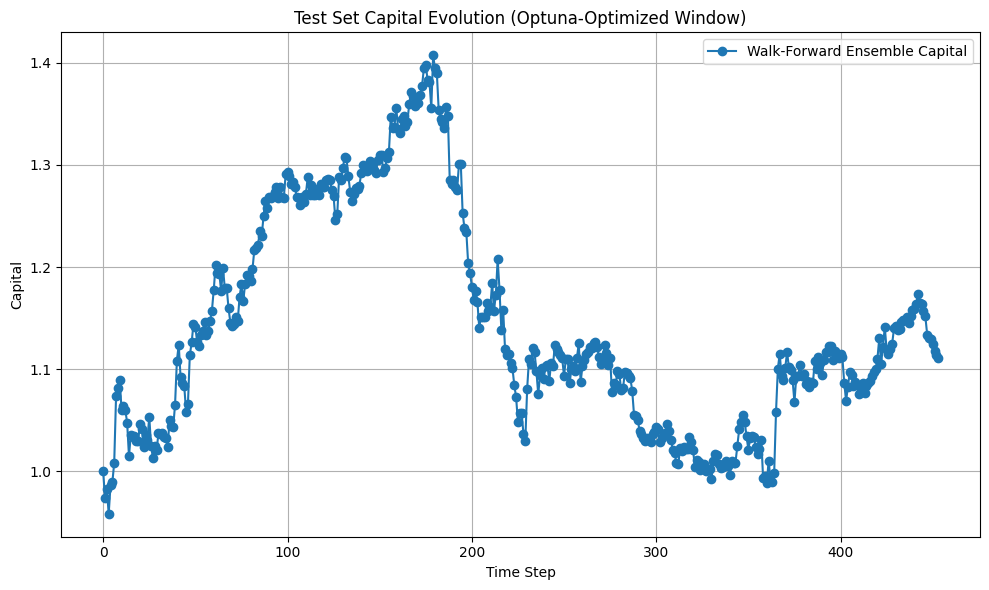

[I 2025-02-25 18:35:02,954] A new study created in memory with name: no-name-5755aa58-16da-4399-bba5-1bb5ca39c791


Saved updated file with ensemble predictions to: /notebooks/ticker_results/amgn_merged_ensemble.csv


[I 2025-02-25 18:35:03,977] Trial 0 finished with value: 1.0471032424834765 and parameters: {'window': 49}. Best is trial 0 with value: 1.0471032424834765.
[I 2025-02-25 18:35:04,927] Trial 1 finished with value: 1.0535943882984031 and parameters: {'window': 46}. Best is trial 1 with value: 1.0535943882984031.
[I 2025-02-25 18:35:05,936] Trial 2 finished with value: 1.0524277015214765 and parameters: {'window': 29}. Best is trial 1 with value: 1.0535943882984031.
[I 2025-02-25 18:35:06,933] Trial 3 finished with value: 1.0465021163159514 and parameters: {'window': 22}. Best is trial 1 with value: 1.0535943882984031.
[I 2025-02-25 18:35:07,895] Trial 4 finished with value: 1.0582424414830052 and parameters: {'window': 30}. Best is trial 4 with value: 1.0582424414830052.
[I 2025-02-25 18:35:08,953] Trial 5 finished with value: 1.0485445254300836 and parameters: {'window': 47}. Best is trial 4 with value: 1.0582424414830052.
[I 2025-02-25 18:35:10,021] Trial 6 finished with value: 1.05242

Retuning on 481 samples: Best window = 6, Best performance = 1.1066


[I 2025-02-25 18:35:30,228] A new study created in memory with name: no-name-5ffdd24b-f9d6-4722-a2be-7398be77e398
[I 2025-02-25 18:35:31,274] Trial 0 finished with value: 1.0255899463304585 and parameters: {'window': 10}. Best is trial 0 with value: 1.0255899463304585.
[I 2025-02-25 18:35:32,281] Trial 1 finished with value: 1.0646691977442921 and parameters: {'window': 34}. Best is trial 1 with value: 1.0646691977442921.
[I 2025-02-25 18:35:33,451] Trial 2 finished with value: 1.0574079409951278 and parameters: {'window': 48}. Best is trial 1 with value: 1.0646691977442921.
[I 2025-02-25 18:35:34,625] Trial 3 finished with value: 1.0187182685264937 and parameters: {'window': 16}. Best is trial 1 with value: 1.0646691977442921.
[I 2025-02-25 18:35:35,827] Trial 4 finished with value: 1.035401674578503 and parameters: {'window': 2}. Best is trial 1 with value: 1.0646691977442921.
[I 2025-02-25 18:35:37,130] Trial 5 finished with value: 1.0462775751201272 and parameters: {'window': 30}. 

Retuning on 511 samples: Best window = 6, Best performance = 1.1025


[I 2025-02-25 18:35:59,539] A new study created in memory with name: no-name-e144836f-3a75-4ead-98a8-68adb85a2e5b
[I 2025-02-25 18:36:00,734] Trial 0 finished with value: 1.0623641006612075 and parameters: {'window': 8}. Best is trial 0 with value: 1.0623641006612075.
[I 2025-02-25 18:36:02,035] Trial 1 finished with value: 1.1106497273552756 and parameters: {'window': 6}. Best is trial 1 with value: 1.1106497273552756.
[I 2025-02-25 18:36:03,362] Trial 2 finished with value: 1.0298748474573438 and parameters: {'window': 43}. Best is trial 1 with value: 1.1106497273552756.
[I 2025-02-25 18:36:04,559] Trial 3 finished with value: 1.036741299721317 and parameters: {'window': 49}. Best is trial 1 with value: 1.1106497273552756.
[I 2025-02-25 18:36:05,722] Trial 4 finished with value: 1.0219876547197486 and parameters: {'window': 2}. Best is trial 1 with value: 1.1106497273552756.
[I 2025-02-25 18:36:06,870] Trial 5 finished with value: 1.0541569309222563 and parameters: {'window': 38}. Be

Retuning on 541 samples: Best window = 6, Best performance = 1.1106


[I 2025-02-25 18:36:29,701] A new study created in memory with name: no-name-61ab3baa-8584-417b-890c-c68cd4fd1bfb
[I 2025-02-25 18:36:30,974] Trial 0 finished with value: 1.0476795471649725 and parameters: {'window': 15}. Best is trial 0 with value: 1.0476795471649725.
[I 2025-02-25 18:36:32,192] Trial 1 finished with value: 1.0493626768186735 and parameters: {'window': 41}. Best is trial 1 with value: 1.0493626768186735.
[I 2025-02-25 18:36:33,408] Trial 2 finished with value: 1.0420790813883165 and parameters: {'window': 23}. Best is trial 1 with value: 1.0493626768186735.
[I 2025-02-25 18:36:34,625] Trial 3 finished with value: 1.0344896131618355 and parameters: {'window': 16}. Best is trial 1 with value: 1.0493626768186735.
[I 2025-02-25 18:36:35,794] Trial 4 finished with value: 1.0622568592092008 and parameters: {'window': 5}. Best is trial 4 with value: 1.0622568592092008.
[I 2025-02-25 18:36:37,083] Trial 5 finished with value: 1.0693339861488398 and parameters: {'window': 3}. 

Retuning on 571 samples: Best window = 6, Best performance = 1.1125


[I 2025-02-25 18:37:01,230] A new study created in memory with name: no-name-e802bd8f-0709-410a-9b2b-ed2d68635a23
[I 2025-02-25 18:37:02,455] Trial 0 finished with value: 1.0944435839532527 and parameters: {'window': 12}. Best is trial 0 with value: 1.0944435839532527.
[I 2025-02-25 18:37:03,722] Trial 1 finished with value: 1.0739722732566892 and parameters: {'window': 29}. Best is trial 0 with value: 1.0944435839532527.
[I 2025-02-25 18:37:05,020] Trial 2 finished with value: 1.043177564354758 and parameters: {'window': 1}. Best is trial 0 with value: 1.0944435839532527.
[I 2025-02-25 18:37:06,357] Trial 3 finished with value: 1.0918652866494383 and parameters: {'window': 34}. Best is trial 0 with value: 1.0944435839532527.
[I 2025-02-25 18:37:07,600] Trial 4 finished with value: 1.092167139681005 and parameters: {'window': 32}. Best is trial 0 with value: 1.0944435839532527.
[I 2025-02-25 18:37:08,821] Trial 5 finished with value: 1.0944435839532527 and parameters: {'window': 12}. B

Retuning on 601 samples: Best window = 6, Best performance = 1.1493


[I 2025-02-25 18:37:36,577] A new study created in memory with name: no-name-c0813144-584d-4846-9061-c7563bfc029c
[I 2025-02-25 18:37:38,216] Trial 0 finished with value: 1.123044371487413 and parameters: {'window': 32}. Best is trial 0 with value: 1.123044371487413.
[I 2025-02-25 18:37:39,750] Trial 1 finished with value: 1.0805710219118645 and parameters: {'window': 24}. Best is trial 0 with value: 1.123044371487413.
[I 2025-02-25 18:37:41,152] Trial 2 finished with value: 1.1421879539962707 and parameters: {'window': 7}. Best is trial 2 with value: 1.1421879539962707.
[I 2025-02-25 18:37:42,648] Trial 3 finished with value: 1.098251052129901 and parameters: {'window': 17}. Best is trial 2 with value: 1.1421879539962707.
[I 2025-02-25 18:37:44,210] Trial 4 finished with value: 1.085229633492832 and parameters: {'window': 36}. Best is trial 2 with value: 1.1421879539962707.
[I 2025-02-25 18:37:45,878] Trial 5 finished with value: 1.094605699130657 and parameters: {'window': 27}. Best 

Retuning on 631 samples: Best window = 7, Best performance = 1.1422


[I 2025-02-25 18:38:10,979] A new study created in memory with name: no-name-f6ab9e6c-155a-4c1b-b555-f950fba4a338
[I 2025-02-25 18:38:12,407] Trial 0 finished with value: 1.0765309754160495 and parameters: {'window': 43}. Best is trial 0 with value: 1.0765309754160495.
[I 2025-02-25 18:38:14,013] Trial 1 finished with value: 1.0941677836910768 and parameters: {'window': 38}. Best is trial 1 with value: 1.0941677836910768.
[I 2025-02-25 18:38:15,504] Trial 2 finished with value: 1.1070202140397727 and parameters: {'window': 16}. Best is trial 2 with value: 1.1070202140397727.
[I 2025-02-25 18:38:16,924] Trial 3 finished with value: 1.1174158631600946 and parameters: {'window': 17}. Best is trial 3 with value: 1.1174158631600946.
[I 2025-02-25 18:38:18,468] Trial 4 finished with value: 1.12708511503877 and parameters: {'window': 29}. Best is trial 4 with value: 1.12708511503877.
[I 2025-02-25 18:38:20,026] Trial 5 finished with value: 1.1265557471146033 and parameters: {'window': 11}. Be

Retuning on 661 samples: Best window = 8, Best performance = 1.1316


[I 2025-02-25 18:38:50,249] A new study created in memory with name: no-name-2566ede3-d669-42f9-a83e-547002096c3f
[I 2025-02-25 18:38:51,849] Trial 0 finished with value: 1.1316658091688336 and parameters: {'window': 31}. Best is trial 0 with value: 1.1316658091688336.
[I 2025-02-25 18:38:53,461] Trial 1 finished with value: 1.1976471708070089 and parameters: {'window': 7}. Best is trial 1 with value: 1.1976471708070089.
[I 2025-02-25 18:38:55,045] Trial 2 finished with value: 1.1099024822226018 and parameters: {'window': 20}. Best is trial 1 with value: 1.1976471708070089.
[I 2025-02-25 18:38:56,550] Trial 3 finished with value: 1.1390636927000861 and parameters: {'window': 9}. Best is trial 1 with value: 1.1976471708070089.
[I 2025-02-25 18:38:58,086] Trial 4 finished with value: 1.1389329299113384 and parameters: {'window': 16}. Best is trial 1 with value: 1.1976471708070089.
[I 2025-02-25 18:38:59,615] Trial 5 finished with value: 1.1208384051747007 and parameters: {'window': 19}. 

Retuning on 691 samples: Best window = 7, Best performance = 1.1976


[I 2025-02-25 18:39:28,635] A new study created in memory with name: no-name-e737d6aa-5a8b-4f30-8d09-20ce5108b8e5
[I 2025-02-25 18:39:30,077] Trial 0 finished with value: 1.0645296328917797 and parameters: {'window': 24}. Best is trial 0 with value: 1.0645296328917797.
[I 2025-02-25 18:39:31,610] Trial 1 finished with value: 1.0991114660468502 and parameters: {'window': 28}. Best is trial 1 with value: 1.0991114660468502.
[I 2025-02-25 18:39:33,166] Trial 2 finished with value: 1.0991114660468502 and parameters: {'window': 28}. Best is trial 1 with value: 1.0991114660468502.
[I 2025-02-25 18:39:34,674] Trial 3 finished with value: 1.1609242183702964 and parameters: {'window': 11}. Best is trial 3 with value: 1.1609242183702964.
[I 2025-02-25 18:39:36,246] Trial 4 finished with value: 1.0991114660468502 and parameters: {'window': 28}. Best is trial 3 with value: 1.1609242183702964.
[I 2025-02-25 18:39:37,861] Trial 5 finished with value: 1.1349489875219083 and parameters: {'window': 16}

Retuning on 721 samples: Best window = 7, Best performance = 1.2092


[I 2025-02-25 18:40:07,582] A new study created in memory with name: no-name-0463229a-7741-48b7-854c-6d7f6fa9a5b8
[I 2025-02-25 18:40:09,345] Trial 0 finished with value: 1.0811821350148194 and parameters: {'window': 23}. Best is trial 0 with value: 1.0811821350148194.
[I 2025-02-25 18:40:10,955] Trial 1 finished with value: 1.118415616892848 and parameters: {'window': 21}. Best is trial 1 with value: 1.118415616892848.
[I 2025-02-25 18:40:12,632] Trial 2 finished with value: 1.1136155394584941 and parameters: {'window': 28}. Best is trial 1 with value: 1.118415616892848.
[I 2025-02-25 18:40:14,283] Trial 3 finished with value: 1.1624335170199442 and parameters: {'window': 12}. Best is trial 3 with value: 1.1624335170199442.
[I 2025-02-25 18:40:15,996] Trial 4 finished with value: 1.152939831142621 and parameters: {'window': 32}. Best is trial 3 with value: 1.1624335170199442.
[I 2025-02-25 18:40:17,696] Trial 5 finished with value: 1.118415616892848 and parameters: {'window': 21}. Bes

Retuning on 751 samples: Best window = 17, Best performance = 1.1673


[I 2025-02-25 18:40:51,091] A new study created in memory with name: no-name-c0ae1eb2-664c-47b8-8eb1-f544925cb27f
[I 2025-02-25 18:40:52,947] Trial 0 finished with value: 1.0958599340183022 and parameters: {'window': 47}. Best is trial 0 with value: 1.0958599340183022.
[I 2025-02-25 18:40:54,786] Trial 1 finished with value: 1.1674207681792121 and parameters: {'window': 33}. Best is trial 1 with value: 1.1674207681792121.
[I 2025-02-25 18:40:56,616] Trial 2 finished with value: 1.1070579721025162 and parameters: {'window': 46}. Best is trial 1 with value: 1.1674207681792121.
[I 2025-02-25 18:40:58,547] Trial 3 finished with value: 1.1070579721025162 and parameters: {'window': 46}. Best is trial 1 with value: 1.1674207681792121.
[I 2025-02-25 18:41:00,519] Trial 4 finished with value: 1.164934908268849 and parameters: {'window': 40}. Best is trial 1 with value: 1.1674207681792121.
[I 2025-02-25 18:41:02,255] Trial 5 finished with value: 1.0912241284200757 and parameters: {'window': 2}. 

Retuning on 781 samples: Best window = 7, Best performance = 1.2250


[I 2025-02-25 18:41:38,659] A new study created in memory with name: no-name-93848914-543c-43e7-9e5f-833bb37a4634
[I 2025-02-25 18:41:40,599] Trial 0 finished with value: 1.1377520393927683 and parameters: {'window': 18}. Best is trial 0 with value: 1.1377520393927683.
[I 2025-02-25 18:41:42,503] Trial 1 finished with value: 1.1377520393927683 and parameters: {'window': 18}. Best is trial 0 with value: 1.1377520393927683.
[I 2025-02-25 18:41:44,609] Trial 2 finished with value: 1.1522916880423737 and parameters: {'window': 32}. Best is trial 2 with value: 1.1522916880423737.
[I 2025-02-25 18:41:46,846] Trial 3 finished with value: 1.0999271279769727 and parameters: {'window': 47}. Best is trial 2 with value: 1.1522916880423737.
[I 2025-02-25 18:41:49,395] Trial 4 finished with value: 1.1500404939477278 and parameters: {'window': 31}. Best is trial 2 with value: 1.1522916880423737.
[I 2025-02-25 18:41:51,353] Trial 5 finished with value: 1.18221737350401 and parameters: {'window': 11}. 

Retuning on 811 samples: Best window = 7, Best performance = 1.2215


[I 2025-02-25 18:42:26,791] A new study created in memory with name: no-name-3a407da2-110e-451b-822b-a204c5f7416d
[I 2025-02-25 18:42:28,698] Trial 0 finished with value: 1.0922889506045799 and parameters: {'window': 49}. Best is trial 0 with value: 1.0922889506045799.
[I 2025-02-25 18:42:30,482] Trial 1 finished with value: 1.1073181463522677 and parameters: {'window': 14}. Best is trial 1 with value: 1.1073181463522677.
[I 2025-02-25 18:42:32,212] Trial 2 finished with value: 1.155615118951273 and parameters: {'window': 10}. Best is trial 2 with value: 1.155615118951273.
[I 2025-02-25 18:42:33,934] Trial 3 finished with value: 1.0771719457752487 and parameters: {'window': 3}. Best is trial 2 with value: 1.155615118951273.
[I 2025-02-25 18:42:35,991] Trial 4 finished with value: 1.0796056114549573 and parameters: {'window': 44}. Best is trial 2 with value: 1.155615118951273.
[I 2025-02-25 18:42:37,830] Trial 5 finished with value: 1.0796056114549573 and parameters: {'window': 44}. Bes

Retuning on 841 samples: Best window = 7, Best performance = 1.2240


[I 2025-02-25 18:43:13,910] A new study created in memory with name: no-name-b78ca9a9-28c9-4ee9-b59c-53d5b9f8b7df
[I 2025-02-25 18:43:15,806] Trial 0 finished with value: 1.1865468819157292 and parameters: {'window': 17}. Best is trial 0 with value: 1.1865468819157292.
[I 2025-02-25 18:43:17,641] Trial 1 finished with value: 1.1416630505764571 and parameters: {'window': 38}. Best is trial 0 with value: 1.1865468819157292.
[I 2025-02-25 18:43:19,610] Trial 2 finished with value: 1.0781329972601732 and parameters: {'window': 44}. Best is trial 0 with value: 1.1865468819157292.
[I 2025-02-25 18:43:21,501] Trial 3 finished with value: 1.059814740554255 and parameters: {'window': 3}. Best is trial 0 with value: 1.1865468819157292.
[I 2025-02-25 18:43:23,739] Trial 4 finished with value: 1.059475096589796 and parameters: {'window': 23}. Best is trial 0 with value: 1.1865468819157292.
[I 2025-02-25 18:43:25,909] Trial 5 finished with value: 1.1416630505764571 and parameters: {'window': 38}. B

Retuning on 871 samples: Best window = 7, Best performance = 1.2259


[I 2025-02-25 18:44:02,406] A new study created in memory with name: no-name-f9922545-5ea2-4747-99d2-dc939ac4aa72
[I 2025-02-25 18:44:04,335] Trial 0 finished with value: 1.09410124376098 and parameters: {'window': 49}. Best is trial 0 with value: 1.09410124376098.
[I 2025-02-25 18:44:06,342] Trial 1 finished with value: 1.136280685386245 and parameters: {'window': 40}. Best is trial 1 with value: 1.136280685386245.
[I 2025-02-25 18:44:08,253] Trial 2 finished with value: 1.09410124376098 and parameters: {'window': 49}. Best is trial 1 with value: 1.136280685386245.
[I 2025-02-25 18:44:10,227] Trial 3 finished with value: 1.1492719124857012 and parameters: {'window': 10}. Best is trial 3 with value: 1.1492719124857012.
[I 2025-02-25 18:44:12,147] Trial 4 finished with value: 1.09410124376098 and parameters: {'window': 49}. Best is trial 3 with value: 1.1492719124857012.
[I 2025-02-25 18:44:14,610] Trial 5 finished with value: 1.1029227420680978 and parameters: {'window': 42}. Best is t

Retuning on 901 samples: Best window = 7, Best performance = 1.2079


[I 2025-02-25 18:44:54,073] A new study created in memory with name: no-name-50befd27-a0f8-4b9c-bdd1-5b6c71a2d0a2
[I 2025-02-25 18:44:56,306] Trial 0 finished with value: 1.08242496450643 and parameters: {'window': 44}. Best is trial 0 with value: 1.08242496450643.
[I 2025-02-25 18:44:58,309] Trial 1 finished with value: 1.177524091308851 and parameters: {'window': 16}. Best is trial 1 with value: 1.177524091308851.
[I 2025-02-25 18:45:00,480] Trial 2 finished with value: 1.171306683931519 and parameters: {'window': 39}. Best is trial 1 with value: 1.177524091308851.
[I 2025-02-25 18:45:02,577] Trial 3 finished with value: 1.156297495154678 and parameters: {'window': 33}. Best is trial 1 with value: 1.177524091308851.
[I 2025-02-25 18:45:04,635] Trial 4 finished with value: 1.1403027593405697 and parameters: {'window': 35}. Best is trial 1 with value: 1.177524091308851.
[I 2025-02-25 18:45:06,740] Trial 5 finished with value: 1.0717784889114683 and parameters: {'window': 26}. Best is t

Retuning on 902 samples: Best window = 17, Best performance = 1.1920


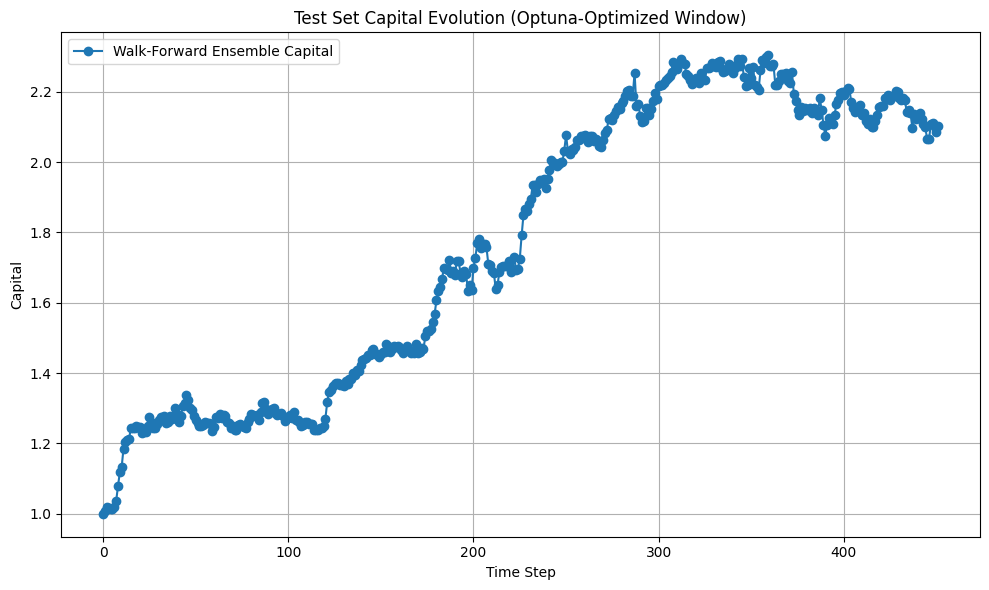

[I 2025-02-25 18:45:47,336] A new study created in memory with name: no-name-909b3572-114d-45fe-a188-f5f3872e3f2e


Saved updated file with ensemble predictions to: /notebooks/ticker_results/bax_merged_ensemble.csv


[I 2025-02-25 18:45:48,409] Trial 0 finished with value: 1.0243984887275477 and parameters: {'window': 13}. Best is trial 0 with value: 1.0243984887275477.
[I 2025-02-25 18:45:49,562] Trial 1 finished with value: 0.9992963904562444 and parameters: {'window': 15}. Best is trial 0 with value: 1.0243984887275477.
[I 2025-02-25 18:45:50,625] Trial 2 finished with value: 0.9992963904562444 and parameters: {'window': 15}. Best is trial 0 with value: 1.0243984887275477.
[I 2025-02-25 18:45:51,628] Trial 3 finished with value: 1.0243984887275477 and parameters: {'window': 13}. Best is trial 0 with value: 1.0243984887275477.
[I 2025-02-25 18:45:52,627] Trial 4 finished with value: 1.0881849944553248 and parameters: {'window': 48}. Best is trial 4 with value: 1.0881849944553248.
[I 2025-02-25 18:45:53,653] Trial 5 finished with value: 1.0404168217890841 and parameters: {'window': 12}. Best is trial 4 with value: 1.0881849944553248.
[I 2025-02-25 18:45:54,634] Trial 6 finished with value: 1.11696

Retuning on 485 samples: Best window = 50, Best performance = 1.1170


[I 2025-02-25 18:46:14,834] A new study created in memory with name: no-name-85fd6cff-b67c-426a-a15a-614afea7e5e6
[I 2025-02-25 18:46:15,987] Trial 0 finished with value: 1.057467735661935 and parameters: {'window': 47}. Best is trial 0 with value: 1.057467735661935.
[I 2025-02-25 18:46:17,184] Trial 1 finished with value: 1.0785015041546149 and parameters: {'window': 48}. Best is trial 1 with value: 1.0785015041546149.
[I 2025-02-25 18:46:18,244] Trial 2 finished with value: 1.057467735661935 and parameters: {'window': 47}. Best is trial 1 with value: 1.0785015041546149.
[I 2025-02-25 18:46:19,262] Trial 3 finished with value: 1.0337543193475562 and parameters: {'window': 17}. Best is trial 1 with value: 1.0785015041546149.
[I 2025-02-25 18:46:20,313] Trial 4 finished with value: 1.0096437997101637 and parameters: {'window': 13}. Best is trial 1 with value: 1.0785015041546149.
[I 2025-02-25 18:46:21,357] Trial 5 finished with value: 1.057467735661935 and parameters: {'window': 47}. Be

Retuning on 515 samples: Best window = 40, Best performance = 1.1125


[I 2025-02-25 18:46:45,694] A new study created in memory with name: no-name-ec636079-dd44-4698-8cac-fbdc72235169
[I 2025-02-25 18:46:47,036] Trial 0 finished with value: 1.1095999371185836 and parameters: {'window': 43}. Best is trial 0 with value: 1.1095999371185836.
[I 2025-02-25 18:46:48,335] Trial 1 finished with value: 1.1138447306123918 and parameters: {'window': 50}. Best is trial 1 with value: 1.1138447306123918.
[I 2025-02-25 18:46:49,685] Trial 2 finished with value: 0.9328100388707702 and parameters: {'window': 2}. Best is trial 1 with value: 1.1138447306123918.
[I 2025-02-25 18:46:50,932] Trial 3 finished with value: 1.0835132037556106 and parameters: {'window': 25}. Best is trial 1 with value: 1.1138447306123918.
[I 2025-02-25 18:46:52,111] Trial 4 finished with value: 1.0164016300522234 and parameters: {'window': 7}. Best is trial 1 with value: 1.1138447306123918.
[I 2025-02-25 18:46:53,326] Trial 5 finished with value: 1.0294814257710843 and parameters: {'window': 29}. 

Retuning on 545 samples: Best window = 50, Best performance = 1.1138


[I 2025-02-25 18:47:18,431] A new study created in memory with name: no-name-4317c1b1-69a7-4183-9bdb-2821d7c5649b
[I 2025-02-25 18:47:19,765] Trial 0 finished with value: 0.9866473251124424 and parameters: {'window': 10}. Best is trial 0 with value: 0.9866473251124424.
[I 2025-02-25 18:47:21,162] Trial 1 finished with value: 0.9602597210521434 and parameters: {'window': 9}. Best is trial 0 with value: 0.9866473251124424.
[I 2025-02-25 18:47:22,560] Trial 2 finished with value: 1.0621683728166684 and parameters: {'window': 45}. Best is trial 2 with value: 1.0621683728166684.
[I 2025-02-25 18:47:24,023] Trial 3 finished with value: 1.060170321212225 and parameters: {'window': 42}. Best is trial 2 with value: 1.0621683728166684.
[I 2025-02-25 18:47:25,356] Trial 4 finished with value: 1.084586763381878 and parameters: {'window': 21}. Best is trial 4 with value: 1.084586763381878.
[I 2025-02-25 18:47:26,814] Trial 5 finished with value: 0.9378932774412838 and parameters: {'window': 5}. Bes

Retuning on 575 samples: Best window = 24, Best performance = 1.0917


[I 2025-02-25 18:47:53,507] A new study created in memory with name: no-name-c01250e2-1a2f-4afb-a323-54c1ef559440
[I 2025-02-25 18:47:55,015] Trial 0 finished with value: 1.063365856819083 and parameters: {'window': 31}. Best is trial 0 with value: 1.063365856819083.
[I 2025-02-25 18:47:56,559] Trial 1 finished with value: 1.0806337629230447 and parameters: {'window': 49}. Best is trial 1 with value: 1.0806337629230447.
[I 2025-02-25 18:47:58,292] Trial 2 finished with value: 1.0151494560127798 and parameters: {'window': 28}. Best is trial 1 with value: 1.0806337629230447.
[I 2025-02-25 18:47:59,959] Trial 3 finished with value: 1.0644575184123102 and parameters: {'window': 44}. Best is trial 1 with value: 1.0806337629230447.
[I 2025-02-25 18:48:01,491] Trial 4 finished with value: 1.0850214981732305 and parameters: {'window': 24}. Best is trial 4 with value: 1.0850214981732305.
[I 2025-02-25 18:48:03,068] Trial 5 finished with value: 1.0371439736251087 and parameters: {'window': 27}. 

Retuning on 605 samples: Best window = 50, Best performance = 1.1020


[I 2025-02-25 18:48:33,241] A new study created in memory with name: no-name-985cbc10-ea27-4669-85df-840370d1d3b4
[I 2025-02-25 18:48:34,599] Trial 0 finished with value: 0.9184968780707603 and parameters: {'window': 2}. Best is trial 0 with value: 0.9184968780707603.
[I 2025-02-25 18:48:35,979] Trial 1 finished with value: 1.0838455802751645 and parameters: {'window': 24}. Best is trial 1 with value: 1.0838455802751645.
[I 2025-02-25 18:48:37,493] Trial 2 finished with value: 0.9440747109935259 and parameters: {'window': 3}. Best is trial 1 with value: 1.0838455802751645.
[I 2025-02-25 18:48:39,125] Trial 3 finished with value: 1.0697972079384481 and parameters: {'window': 23}. Best is trial 1 with value: 1.0838455802751645.
[I 2025-02-25 18:48:40,604] Trial 4 finished with value: 1.0362973617086237 and parameters: {'window': 29}. Best is trial 1 with value: 1.0838455802751645.
[I 2025-02-25 18:48:42,038] Trial 5 finished with value: 1.0591109960148153 and parameters: {'window': 44}. 

Retuning on 635 samples: Best window = 40, Best performance = 1.1096


[I 2025-02-25 18:49:10,872] A new study created in memory with name: no-name-b2d0c5d0-d9ae-43b6-be07-3b45d85a6f59
[I 2025-02-25 18:49:12,413] Trial 0 finished with value: 1.033186960259774 and parameters: {'window': 29}. Best is trial 0 with value: 1.033186960259774.
[I 2025-02-25 18:49:13,921] Trial 1 finished with value: 0.9222205010185087 and parameters: {'window': 9}. Best is trial 0 with value: 1.033186960259774.
[I 2025-02-25 18:49:15,416] Trial 2 finished with value: 1.06094030158086 and parameters: {'window': 24}. Best is trial 2 with value: 1.06094030158086.
[I 2025-02-25 18:49:16,895] Trial 3 finished with value: 1.0563841075680425 and parameters: {'window': 25}. Best is trial 2 with value: 1.06094030158086.
[I 2025-02-25 18:49:18,332] Trial 4 finished with value: 1.084037444432644 and parameters: {'window': 43}. Best is trial 4 with value: 1.084037444432644.
[I 2025-02-25 18:49:19,768] Trial 5 finished with value: 1.0714271365453563 and parameters: {'window': 22}. Best is tr

Retuning on 665 samples: Best window = 37, Best performance = 1.0924


[I 2025-02-25 18:49:52,279] A new study created in memory with name: no-name-b90a1c96-28c7-4f94-965c-b2f846e75dfd
[I 2025-02-25 18:49:54,037] Trial 0 finished with value: 1.0773146065155952 and parameters: {'window': 40}. Best is trial 0 with value: 1.0773146065155952.
[I 2025-02-25 18:49:55,897] Trial 1 finished with value: 1.0721464251782016 and parameters: {'window': 24}. Best is trial 0 with value: 1.0773146065155952.
[I 2025-02-25 18:49:57,638] Trial 2 finished with value: 1.065181394745611 and parameters: {'window': 23}. Best is trial 0 with value: 1.0773146065155952.
[I 2025-02-25 18:49:59,204] Trial 3 finished with value: 0.957165687428061 and parameters: {'window': 3}. Best is trial 0 with value: 1.0773146065155952.
[I 2025-02-25 18:50:00,703] Trial 4 finished with value: 0.9774286800297862 and parameters: {'window': 11}. Best is trial 0 with value: 1.0773146065155952.
[I 2025-02-25 18:50:02,286] Trial 5 finished with value: 0.9241317487786705 and parameters: {'window': 9}. Be

Retuning on 695 samples: Best window = 50, Best performance = 1.0999


[I 2025-02-25 18:50:36,958] A new study created in memory with name: no-name-d5fa9a30-5c0e-4840-aa8c-fb440d1939c6
[I 2025-02-25 18:50:38,604] Trial 0 finished with value: 0.9630295559058041 and parameters: {'window': 1}. Best is trial 0 with value: 0.9630295559058041.
[I 2025-02-25 18:50:40,380] Trial 1 finished with value: 1.0676798523575655 and parameters: {'window': 23}. Best is trial 1 with value: 1.0676798523575655.
[I 2025-02-25 18:50:42,370] Trial 2 finished with value: 0.9446286537300603 and parameters: {'window': 4}. Best is trial 1 with value: 1.0676798523575655.
[I 2025-02-25 18:50:44,175] Trial 3 finished with value: 0.9730875896607385 and parameters: {'window': 3}. Best is trial 1 with value: 1.0676798523575655.
[I 2025-02-25 18:50:46,091] Trial 4 finished with value: 0.9005866252058043 and parameters: {'window': 2}. Best is trial 1 with value: 1.0676798523575655.
[I 2025-02-25 18:50:48,064] Trial 5 finished with value: 1.020608100935646 and parameters: {'window': 26}. Bes

Retuning on 725 samples: Best window = 50, Best performance = 1.1003


[I 2025-02-25 18:51:24,417] A new study created in memory with name: no-name-e13065d8-cd56-404d-8486-6c773db90002
[I 2025-02-25 18:51:26,456] Trial 0 finished with value: 1.0350649019989524 and parameters: {'window': 31}. Best is trial 0 with value: 1.0350649019989524.
[I 2025-02-25 18:51:28,429] Trial 1 finished with value: 0.9731758722767052 and parameters: {'window': 11}. Best is trial 0 with value: 1.0350649019989524.
[I 2025-02-25 18:51:30,356] Trial 2 finished with value: 0.9781351668757727 and parameters: {'window': 15}. Best is trial 0 with value: 1.0350649019989524.
[I 2025-02-25 18:51:32,442] Trial 3 finished with value: 1.027252553101343 and parameters: {'window': 19}. Best is trial 0 with value: 1.0350649019989524.
[I 2025-02-25 18:51:34,362] Trial 4 finished with value: 0.967687129072179 and parameters: {'window': 13}. Best is trial 0 with value: 1.0350649019989524.
[I 2025-02-25 18:51:36,328] Trial 5 finished with value: 0.9731758722767052 and parameters: {'window': 11}. 

Retuning on 755 samples: Best window = 50, Best performance = 1.0824


[I 2025-02-25 18:52:12,887] A new study created in memory with name: no-name-87169008-7720-4d30-9ae4-8bd3d8935946
[I 2025-02-25 18:52:14,954] Trial 0 finished with value: 1.0724373561015472 and parameters: {'window': 24}. Best is trial 0 with value: 1.0724373561015472.
[I 2025-02-25 18:52:17,160] Trial 1 finished with value: 0.9543752731799262 and parameters: {'window': 3}. Best is trial 0 with value: 1.0724373561015472.
[I 2025-02-25 18:52:19,246] Trial 2 finished with value: 0.9737343946188345 and parameters: {'window': 7}. Best is trial 0 with value: 1.0724373561015472.
[I 2025-02-25 18:52:21,203] Trial 3 finished with value: 0.9813784430104715 and parameters: {'window': 11}. Best is trial 0 with value: 1.0724373561015472.
[I 2025-02-25 18:52:23,528] Trial 4 finished with value: 1.0517124059415615 and parameters: {'window': 46}. Best is trial 0 with value: 1.0724373561015472.
[I 2025-02-25 18:52:25,609] Trial 5 finished with value: 0.9371015914821337 and parameters: {'window': 4}. B

Retuning on 785 samples: Best window = 50, Best performance = 1.0978


[I 2025-02-25 18:53:05,518] A new study created in memory with name: no-name-8683ddf1-0685-4810-b314-4f72a0c3478b
[I 2025-02-25 18:53:07,773] Trial 0 finished with value: 0.9907081944707979 and parameters: {'window': 7}. Best is trial 0 with value: 0.9907081944707979.
[I 2025-02-25 18:53:10,004] Trial 1 finished with value: 0.9794557953654657 and parameters: {'window': 13}. Best is trial 0 with value: 0.9907081944707979.
[I 2025-02-25 18:53:12,005] Trial 2 finished with value: 1.0138700673681047 and parameters: {'window': 34}. Best is trial 2 with value: 1.0138700673681047.
[I 2025-02-25 18:53:13,911] Trial 3 finished with value: 1.0599447057619853 and parameters: {'window': 19}. Best is trial 3 with value: 1.0599447057619853.
[I 2025-02-25 18:53:16,311] Trial 4 finished with value: 1.0784253617672777 and parameters: {'window': 49}. Best is trial 4 with value: 1.0784253617672777.
[I 2025-02-25 18:53:18,388] Trial 5 finished with value: 1.0754565962809852 and parameters: {'window': 37}.

Retuning on 815 samples: Best window = 50, Best performance = 1.0907


[I 2025-02-25 18:53:57,776] A new study created in memory with name: no-name-e1815b03-99c2-40c5-8ad6-ce75b8d58902
[I 2025-02-25 18:53:59,744] Trial 0 finished with value: 1.0152607832022984 and parameters: {'window': 35}. Best is trial 0 with value: 1.0152607832022984.
[I 2025-02-25 18:54:01,592] Trial 1 finished with value: 0.9939882676376092 and parameters: {'window': 33}. Best is trial 0 with value: 1.0152607832022984.
[I 2025-02-25 18:54:03,561] Trial 2 finished with value: 1.0164685406080887 and parameters: {'window': 41}. Best is trial 2 with value: 1.0164685406080887.
[I 2025-02-25 18:54:05,450] Trial 3 finished with value: 1.0408101225708788 and parameters: {'window': 16}. Best is trial 3 with value: 1.0408101225708788.
[I 2025-02-25 18:54:07,373] Trial 4 finished with value: 0.9393706824334412 and parameters: {'window': 9}. Best is trial 3 with value: 1.0408101225708788.
[I 2025-02-25 18:54:09,261] Trial 5 finished with value: 0.9957109652845423 and parameters: {'window': 47}.

Retuning on 845 samples: Best window = 22, Best performance = 1.0674


[I 2025-02-25 18:54:51,763] A new study created in memory with name: no-name-12a540f6-36a6-4b52-91ee-50dc67e42d56
[I 2025-02-25 18:54:53,987] Trial 0 finished with value: 1.0482821680037173 and parameters: {'window': 40}. Best is trial 0 with value: 1.0482821680037173.
[I 2025-02-25 18:54:56,475] Trial 1 finished with value: 0.9994877293287449 and parameters: {'window': 26}. Best is trial 0 with value: 1.0482821680037173.
[I 2025-02-25 18:54:59,168] Trial 2 finished with value: 1.0780862571514054 and parameters: {'window': 50}. Best is trial 2 with value: 1.0780862571514054.
[I 2025-02-25 18:55:01,334] Trial 3 finished with value: 1.0405337713593177 and parameters: {'window': 35}. Best is trial 2 with value: 1.0780862571514054.
[I 2025-02-25 18:55:03,459] Trial 4 finished with value: 1.063607988728103 and parameters: {'window': 24}. Best is trial 2 with value: 1.0780862571514054.
[I 2025-02-25 18:55:05,508] Trial 5 finished with value: 1.0514394564264604 and parameters: {'window': 43}.

Retuning on 875 samples: Best window = 50, Best performance = 1.0781


[I 2025-02-25 18:55:49,693] A new study created in memory with name: no-name-475697a4-c636-4a2a-a9ed-f0c140797111
[I 2025-02-25 18:55:51,874] Trial 0 finished with value: 1.004396638709061 and parameters: {'window': 17}. Best is trial 0 with value: 1.004396638709061.
[I 2025-02-25 18:55:54,199] Trial 1 finished with value: 0.9259985959065116 and parameters: {'window': 4}. Best is trial 0 with value: 1.004396638709061.
[I 2025-02-25 18:55:56,486] Trial 2 finished with value: 1.0307877011048845 and parameters: {'window': 42}. Best is trial 2 with value: 1.0307877011048845.
[I 2025-02-25 18:55:58,906] Trial 3 finished with value: 0.9842005199668407 and parameters: {'window': 15}. Best is trial 2 with value: 1.0307877011048845.
[I 2025-02-25 18:56:01,210] Trial 4 finished with value: 0.9677964453857134 and parameters: {'window': 27}. Best is trial 2 with value: 1.0307877011048845.
[I 2025-02-25 18:56:03,527] Trial 5 finished with value: 0.9878565665259865 and parameters: {'window': 29}. Be

Retuning on 905 samples: Best window = 50, Best performance = 1.0857


[I 2025-02-25 18:56:47,143] A new study created in memory with name: no-name-98ebf1a8-10b3-4922-8582-e5d9b49f650f
[I 2025-02-25 18:56:49,444] Trial 0 finished with value: 0.9963830750716328 and parameters: {'window': 26}. Best is trial 0 with value: 0.9963830750716328.
[I 2025-02-25 18:56:51,814] Trial 1 finished with value: 1.0369778958533689 and parameters: {'window': 19}. Best is trial 1 with value: 1.0369778958533689.
[I 2025-02-25 18:56:53,825] Trial 2 finished with value: 1.0005679346575387 and parameters: {'window': 12}. Best is trial 1 with value: 1.0369778958533689.
[I 2025-02-25 18:56:56,143] Trial 3 finished with value: 1.0634463964273204 and parameters: {'window': 48}. Best is trial 3 with value: 1.0634463964273204.
[I 2025-02-25 18:56:58,583] Trial 4 finished with value: 0.9891953979601704 and parameters: {'window': 32}. Best is trial 3 with value: 1.0634463964273204.
[I 2025-02-25 18:57:00,819] Trial 5 finished with value: 1.0625884620729629 and parameters: {'window': 37}

Retuning on 911 samples: Best window = 50, Best performance = 1.0838


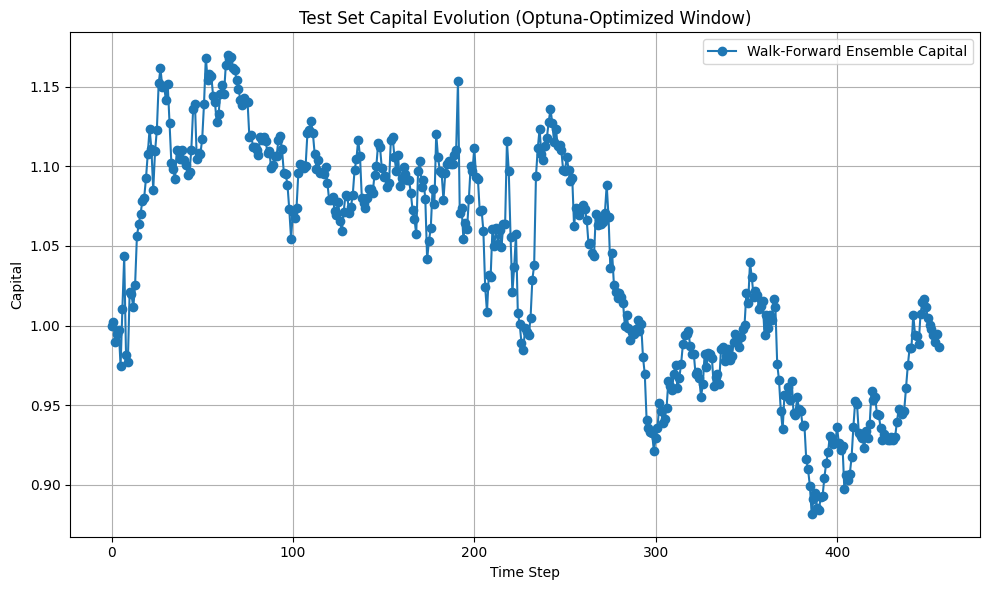

[I 2025-02-25 18:57:46,862] A new study created in memory with name: no-name-4b700070-3a4f-4c72-8c03-e74ed4464d20


Saved updated file with ensemble predictions to: /notebooks/ticker_results/gs_merged_ensemble.csv


[I 2025-02-25 18:57:47,956] Trial 0 finished with value: 1.0039410291829225 and parameters: {'window': 35}. Best is trial 0 with value: 1.0039410291829225.
[I 2025-02-25 18:57:49,185] Trial 1 finished with value: 0.9938756252683097 and parameters: {'window': 41}. Best is trial 0 with value: 1.0039410291829225.
[I 2025-02-25 18:57:50,403] Trial 2 finished with value: 1.0072926037971368 and parameters: {'window': 12}. Best is trial 2 with value: 1.0072926037971368.
[I 2025-02-25 18:57:51,496] Trial 3 finished with value: 1.003010541713935 and parameters: {'window': 36}. Best is trial 2 with value: 1.0072926037971368.
[I 2025-02-25 18:57:52,622] Trial 4 finished with value: 1.0039410291829225 and parameters: {'window': 35}. Best is trial 2 with value: 1.0072926037971368.
[I 2025-02-25 18:57:53,613] Trial 5 finished with value: 1.0028699012337667 and parameters: {'window': 37}. Best is trial 2 with value: 1.0072926037971368.
[I 2025-02-25 18:57:54,671] Trial 6 finished with value: 0.975981

Retuning on 478 samples: Best window = 5, Best performance = 1.0335


[I 2025-02-25 18:58:14,170] A new study created in memory with name: no-name-ce894492-d495-4da4-b3c1-cf46939bb40d
[I 2025-02-25 18:58:15,184] Trial 0 finished with value: 0.9774161007743072 and parameters: {'window': 39}. Best is trial 0 with value: 0.9774161007743072.
[I 2025-02-25 18:58:16,234] Trial 1 finished with value: 0.9870531628556061 and parameters: {'window': 3}. Best is trial 1 with value: 0.9870531628556061.
[I 2025-02-25 18:58:17,275] Trial 2 finished with value: 0.9852544795353122 and parameters: {'window': 1}. Best is trial 1 with value: 0.9870531628556061.
[I 2025-02-25 18:58:18,325] Trial 3 finished with value: 0.9808958617834218 and parameters: {'window': 4}. Best is trial 1 with value: 0.9870531628556061.
[I 2025-02-25 18:58:19,389] Trial 4 finished with value: 0.9675419357045673 and parameters: {'window': 28}. Best is trial 1 with value: 0.9870531628556061.
[I 2025-02-25 18:58:20,419] Trial 5 finished with value: 0.9666826632386615 and parameters: {'window': 49}. B

Retuning on 508 samples: Best window = 12, Best performance = 1.0014


[I 2025-02-25 18:58:42,204] A new study created in memory with name: no-name-1780d302-b795-4b70-8513-9db21df1ff79
[I 2025-02-25 18:58:43,472] Trial 0 finished with value: 0.9911580466643851 and parameters: {'window': 9}. Best is trial 0 with value: 0.9911580466643851.
[I 2025-02-25 18:58:44,681] Trial 1 finished with value: 0.9864763439424342 and parameters: {'window': 49}. Best is trial 0 with value: 0.9911580466643851.
[I 2025-02-25 18:58:45,834] Trial 2 finished with value: 1.0092849674025366 and parameters: {'window': 7}. Best is trial 2 with value: 1.0092849674025366.
[I 2025-02-25 18:58:47,182] Trial 3 finished with value: 0.9864763439424342 and parameters: {'window': 49}. Best is trial 2 with value: 1.0092849674025366.
[I 2025-02-25 18:58:48,464] Trial 4 finished with value: 0.9976280836067541 and parameters: {'window': 44}. Best is trial 2 with value: 1.0092849674025366.
[I 2025-02-25 18:58:49,701] Trial 5 finished with value: 1.0221500980982645 and parameters: {'window': 37}. 

Retuning on 538 samples: Best window = 36, Best performance = 1.0241


[I 2025-02-25 18:59:12,329] A new study created in memory with name: no-name-338e6afe-5ed7-4bda-8600-6fcce0ce00f3
[I 2025-02-25 18:59:13,679] Trial 0 finished with value: 0.9787757119199535 and parameters: {'window': 43}. Best is trial 0 with value: 0.9787757119199535.
[I 2025-02-25 18:59:14,943] Trial 1 finished with value: 0.9956018684999437 and parameters: {'window': 49}. Best is trial 1 with value: 0.9956018684999437.
[I 2025-02-25 18:59:16,445] Trial 2 finished with value: 1.0058706344493693 and parameters: {'window': 32}. Best is trial 2 with value: 1.0058706344493693.
[I 2025-02-25 18:59:17,804] Trial 3 finished with value: 0.9798346506306238 and parameters: {'window': 27}. Best is trial 2 with value: 1.0058706344493693.
[I 2025-02-25 18:59:19,121] Trial 4 finished with value: 1.0025740693860494 and parameters: {'window': 30}. Best is trial 2 with value: 1.0058706344493693.
[I 2025-02-25 18:59:20,401] Trial 5 finished with value: 1.0096961246894334 and parameters: {'window': 13}

Retuning on 568 samples: Best window = 6, Best performance = 1.0354


[I 2025-02-25 18:59:46,723] A new study created in memory with name: no-name-79ee9926-5a21-40bc-b152-77b98879e8bf
[I 2025-02-25 18:59:48,288] Trial 0 finished with value: 1.010706667856644 and parameters: {'window': 32}. Best is trial 0 with value: 1.010706667856644.
[I 2025-02-25 18:59:49,794] Trial 1 finished with value: 1.013764450945279 and parameters: {'window': 31}. Best is trial 1 with value: 1.013764450945279.
[I 2025-02-25 18:59:51,196] Trial 2 finished with value: 0.9887874404773417 and parameters: {'window': 11}. Best is trial 1 with value: 1.013764450945279.
[I 2025-02-25 18:59:52,529] Trial 3 finished with value: 1.006727637541461 and parameters: {'window': 39}. Best is trial 1 with value: 1.013764450945279.
[I 2025-02-25 18:59:53,944] Trial 4 finished with value: 1.0238916812744763 and parameters: {'window': 41}. Best is trial 4 with value: 1.0238916812744763.
[I 2025-02-25 18:59:55,593] Trial 5 finished with value: 0.9493667883666873 and parameters: {'window': 18}. Best 

Retuning on 598 samples: Best window = 36, Best performance = 1.0325


[I 2025-02-25 19:00:25,158] A new study created in memory with name: no-name-f27bc6e8-c5f2-44ce-a23d-5138d0a220a3
[I 2025-02-25 19:00:26,829] Trial 0 finished with value: 0.9910427960563567 and parameters: {'window': 23}. Best is trial 0 with value: 0.9910427960563567.
[I 2025-02-25 19:00:28,372] Trial 1 finished with value: 0.996041828399003 and parameters: {'window': 42}. Best is trial 1 with value: 0.996041828399003.
[I 2025-02-25 19:00:30,152] Trial 2 finished with value: 1.0044490883723323 and parameters: {'window': 25}. Best is trial 2 with value: 1.0044490883723323.
[I 2025-02-25 19:00:31,999] Trial 3 finished with value: 0.9946491607626087 and parameters: {'window': 39}. Best is trial 2 with value: 1.0044490883723323.
[I 2025-02-25 19:00:33,623] Trial 4 finished with value: 1.013585690990194 and parameters: {'window': 34}. Best is trial 4 with value: 1.013585690990194.
[I 2025-02-25 19:00:35,184] Trial 5 finished with value: 0.9940561958348042 and parameters: {'window': 44}. Be

Retuning on 628 samples: Best window = 36, Best performance = 1.0248


[I 2025-02-25 19:01:09,784] A new study created in memory with name: no-name-0c9a7a93-d686-4fc7-aa93-d31e36e0641f
[I 2025-02-25 19:01:11,435] Trial 0 finished with value: 0.9450984442823189 and parameters: {'window': 22}. Best is trial 0 with value: 0.9450984442823189.
[I 2025-02-25 19:01:13,190] Trial 1 finished with value: 0.9655704457020166 and parameters: {'window': 50}. Best is trial 1 with value: 0.9655704457020166.
[I 2025-02-25 19:01:14,936] Trial 2 finished with value: 0.978629671135924 and parameters: {'window': 41}. Best is trial 2 with value: 0.978629671135924.
[I 2025-02-25 19:01:16,425] Trial 3 finished with value: 0.9382659448306823 and parameters: {'window': 14}. Best is trial 2 with value: 0.978629671135924.
[I 2025-02-25 19:01:17,831] Trial 4 finished with value: 0.9704756737832048 and parameters: {'window': 24}. Best is trial 2 with value: 0.978629671135924.
[I 2025-02-25 19:01:19,446] Trial 5 finished with value: 0.9512876097181717 and parameters: {'window': 28}. Be

Retuning on 658 samples: Best window = 36, Best performance = 1.0013


[I 2025-02-25 19:01:52,549] A new study created in memory with name: no-name-e808896c-2678-45fe-bc27-50d1803366ba
[I 2025-02-25 19:01:54,347] Trial 0 finished with value: 0.9781183650091776 and parameters: {'window': 34}. Best is trial 0 with value: 0.9781183650091776.
[I 2025-02-25 19:01:55,885] Trial 1 finished with value: 0.9673652185227528 and parameters: {'window': 10}. Best is trial 0 with value: 0.9781183650091776.
[I 2025-02-25 19:01:57,692] Trial 2 finished with value: 0.9767528868816473 and parameters: {'window': 42}. Best is trial 0 with value: 0.9781183650091776.
[I 2025-02-25 19:01:59,448] Trial 3 finished with value: 0.9407672537075248 and parameters: {'window': 22}. Best is trial 0 with value: 0.9781183650091776.
[I 2025-02-25 19:02:01,074] Trial 4 finished with value: 0.9486108609449315 and parameters: {'window': 2}. Best is trial 0 with value: 0.9781183650091776.
[I 2025-02-25 19:02:02,801] Trial 5 finished with value: 0.9541754109639738 and parameters: {'window': 11}.

Retuning on 688 samples: Best window = 35, Best performance = 0.9981


[I 2025-02-25 19:02:36,187] A new study created in memory with name: no-name-44c5ca09-605c-4d9f-bbd5-fac38f3f62e9
[I 2025-02-25 19:02:37,980] Trial 0 finished with value: 0.9312897690160884 and parameters: {'window': 43}. Best is trial 0 with value: 0.9312897690160884.
[I 2025-02-25 19:02:39,645] Trial 1 finished with value: 0.9864230812860788 and parameters: {'window': 38}. Best is trial 1 with value: 0.9864230812860788.
[I 2025-02-25 19:02:41,445] Trial 2 finished with value: 0.961983929194252 and parameters: {'window': 24}. Best is trial 1 with value: 0.9864230812860788.
[I 2025-02-25 19:02:43,317] Trial 3 finished with value: 0.9649867900406882 and parameters: {'window': 42}. Best is trial 1 with value: 0.9864230812860788.
[I 2025-02-25 19:02:44,974] Trial 4 finished with value: 0.9959580624863797 and parameters: {'window': 6}. Best is trial 4 with value: 0.9959580624863797.
[I 2025-02-25 19:02:47,016] Trial 5 finished with value: 0.9661578701230507 and parameters: {'window': 25}. 

Retuning on 718 samples: Best window = 6, Best performance = 0.9960


[I 2025-02-25 19:03:18,883] A new study created in memory with name: no-name-51fd856d-37bf-4612-bf80-817ce0a09a43
[I 2025-02-25 19:03:20,426] Trial 0 finished with value: 0.9332633036379505 and parameters: {'window': 15}. Best is trial 0 with value: 0.9332633036379505.
[I 2025-02-25 19:03:22,215] Trial 1 finished with value: 0.9338710322830371 and parameters: {'window': 14}. Best is trial 1 with value: 0.9338710322830371.
[I 2025-02-25 19:03:24,339] Trial 2 finished with value: 0.9684275400255373 and parameters: {'window': 46}. Best is trial 2 with value: 0.9684275400255373.
[I 2025-02-25 19:03:26,099] Trial 3 finished with value: 0.9309607556897097 and parameters: {'window': 16}. Best is trial 2 with value: 0.9684275400255373.
[I 2025-02-25 19:03:27,943] Trial 4 finished with value: 0.9779441300649052 and parameters: {'window': 25}. Best is trial 4 with value: 0.9779441300649052.
[I 2025-02-25 19:03:29,998] Trial 5 finished with value: 0.9698664020719422 and parameters: {'window': 50}

Retuning on 748 samples: Best window = 6, Best performance = 1.0058


[I 2025-02-25 19:04:03,450] A new study created in memory with name: no-name-f476328c-cd61-438c-933d-a67cb6546c49
[I 2025-02-25 19:04:05,256] Trial 0 finished with value: 0.9792105249198932 and parameters: {'window': 34}. Best is trial 0 with value: 0.9792105249198932.
[I 2025-02-25 19:04:06,998] Trial 1 finished with value: 0.9679020816747101 and parameters: {'window': 3}. Best is trial 0 with value: 0.9792105249198932.
[I 2025-02-25 19:04:09,145] Trial 2 finished with value: 1.0143171663062058 and parameters: {'window': 5}. Best is trial 2 with value: 1.0143171663062058.
[I 2025-02-25 19:04:11,121] Trial 3 finished with value: 1.0143171663062058 and parameters: {'window': 5}. Best is trial 2 with value: 1.0143171663062058.
[I 2025-02-25 19:04:12,887] Trial 4 finished with value: 1.019764038727974 and parameters: {'window': 6}. Best is trial 4 with value: 1.019764038727974.
[I 2025-02-25 19:04:14,997] Trial 5 finished with value: 0.9547968922502731 and parameters: {'window': 29}. Best

Retuning on 778 samples: Best window = 6, Best performance = 1.0198


[I 2025-02-25 19:04:50,325] A new study created in memory with name: no-name-d8a25d44-8e86-476e-bf47-3d8aee33ba16
[I 2025-02-25 19:04:52,014] Trial 0 finished with value: 1.0018137756080208 and parameters: {'window': 34}. Best is trial 0 with value: 1.0018137756080208.
[I 2025-02-25 19:04:53,670] Trial 1 finished with value: 0.9717059201026125 and parameters: {'window': 8}. Best is trial 0 with value: 1.0018137756080208.
[I 2025-02-25 19:04:55,353] Trial 2 finished with value: 0.991111281417051 and parameters: {'window': 40}. Best is trial 0 with value: 1.0018137756080208.
[I 2025-02-25 19:04:57,120] Trial 3 finished with value: 0.991111281417051 and parameters: {'window': 40}. Best is trial 0 with value: 1.0018137756080208.
[I 2025-02-25 19:04:58,964] Trial 4 finished with value: 0.9759883370735294 and parameters: {'window': 2}. Best is trial 0 with value: 1.0018137756080208.
[I 2025-02-25 19:05:01,063] Trial 5 finished with value: 0.9983008556881549 and parameters: {'window': 24}. Be

Retuning on 808 samples: Best window = 37, Best performance = 1.0296


[I 2025-02-25 19:05:38,049] A new study created in memory with name: no-name-efd103de-153c-41df-a6ee-fa30248439ed
[I 2025-02-25 19:05:40,087] Trial 0 finished with value: 1.0036874267933948 and parameters: {'window': 2}. Best is trial 0 with value: 1.0036874267933948.
[I 2025-02-25 19:05:42,036] Trial 1 finished with value: 0.9902350544598963 and parameters: {'window': 24}. Best is trial 0 with value: 1.0036874267933948.
[I 2025-02-25 19:05:43,926] Trial 2 finished with value: 0.9389157766672233 and parameters: {'window': 16}. Best is trial 0 with value: 1.0036874267933948.
[I 2025-02-25 19:05:45,795] Trial 3 finished with value: 0.9971457430459335 and parameters: {'window': 25}. Best is trial 0 with value: 1.0036874267933948.
[I 2025-02-25 19:05:47,917] Trial 4 finished with value: 0.9709472482912312 and parameters: {'window': 22}. Best is trial 0 with value: 1.0036874267933948.
[I 2025-02-25 19:05:49,787] Trial 5 finished with value: 0.9709472482912312 and parameters: {'window': 22}.

Retuning on 838 samples: Best window = 6, Best performance = 1.0357


[I 2025-02-25 19:06:27,830] A new study created in memory with name: no-name-13c414ed-6cd3-4f8c-b710-d9e36bac4b82
[I 2025-02-25 19:06:30,035] Trial 0 finished with value: 0.9327738322167537 and parameters: {'window': 20}. Best is trial 0 with value: 0.9327738322167537.
[I 2025-02-25 19:06:32,132] Trial 1 finished with value: 1.0348741659759013 and parameters: {'window': 1}. Best is trial 1 with value: 1.0348741659759013.
[I 2025-02-25 19:06:34,350] Trial 2 finished with value: 1.017170470701521 and parameters: {'window': 7}. Best is trial 1 with value: 1.0348741659759013.
[I 2025-02-25 19:06:36,590] Trial 3 finished with value: 0.9665326670468822 and parameters: {'window': 21}. Best is trial 1 with value: 1.0348741659759013.
[I 2025-02-25 19:06:39,118] Trial 4 finished with value: 0.9671070678201851 and parameters: {'window': 45}. Best is trial 1 with value: 1.0348741659759013.
[I 2025-02-25 19:06:41,049] Trial 5 finished with value: 1.020188439809134 and parameters: {'window': 25}. Be

Retuning on 868 samples: Best window = 1, Best performance = 1.0349


[I 2025-02-25 19:07:21,056] A new study created in memory with name: no-name-cd2df5db-c855-49c9-9335-92c95f5d7268
[I 2025-02-25 19:07:23,052] Trial 0 finished with value: 1.0089677512766824 and parameters: {'window': 4}. Best is trial 0 with value: 1.0089677512766824.
[I 2025-02-25 19:07:25,652] Trial 1 finished with value: 1.0399547101820041 and parameters: {'window': 10}. Best is trial 1 with value: 1.0399547101820041.
[I 2025-02-25 19:07:27,802] Trial 2 finished with value: 0.9885276833464431 and parameters: {'window': 28}. Best is trial 1 with value: 1.0399547101820041.
[I 2025-02-25 19:07:29,719] Trial 3 finished with value: 1.003445932727092 and parameters: {'window': 11}. Best is trial 1 with value: 1.0399547101820041.
[I 2025-02-25 19:07:32,046] Trial 4 finished with value: 0.9892350122678912 and parameters: {'window': 27}. Best is trial 1 with value: 1.0399547101820041.
[I 2025-02-25 19:07:34,401] Trial 5 finished with value: 0.9885276833464431 and parameters: {'window': 28}. 

Retuning on 896 samples: Best window = 5, Best performance = 1.0498


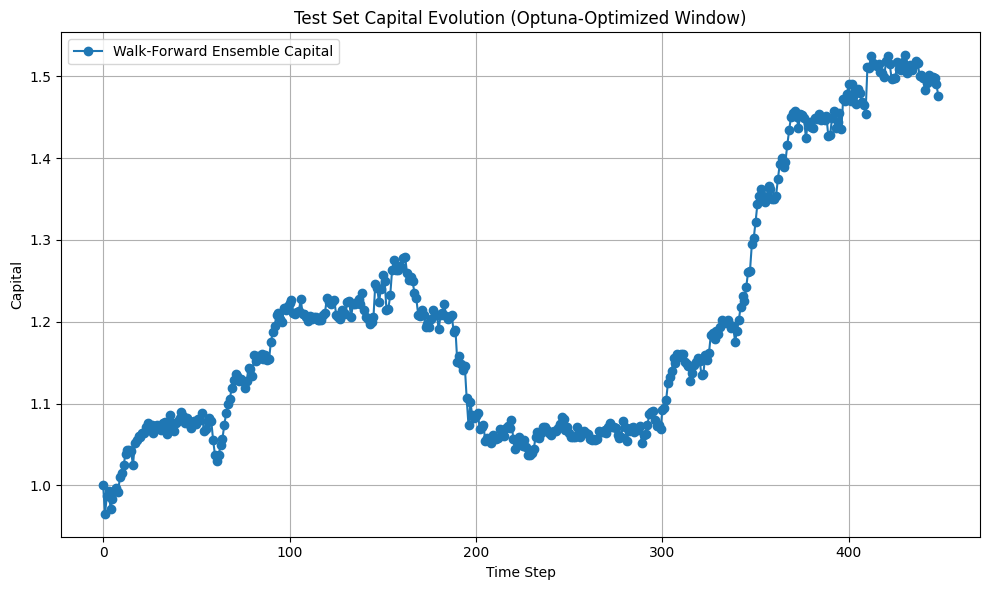

[I 2025-02-25 19:08:15,631] A new study created in memory with name: no-name-b39854de-2613-453e-8f29-76bc2ff3a8aa


Saved updated file with ensemble predictions to: /notebooks/ticker_results/pg_merged_ensemble.csv


[I 2025-02-25 19:08:16,677] Trial 0 finished with value: 1.0681526165225796 and parameters: {'window': 13}. Best is trial 0 with value: 1.0681526165225796.
[I 2025-02-25 19:08:17,682] Trial 1 finished with value: 1.0255984194637562 and parameters: {'window': 44}. Best is trial 0 with value: 1.0681526165225796.
[I 2025-02-25 19:08:18,737] Trial 2 finished with value: 1.003004790737635 and parameters: {'window': 31}. Best is trial 0 with value: 1.0681526165225796.
[I 2025-02-25 19:08:19,763] Trial 3 finished with value: 1.0034873571509961 and parameters: {'window': 43}. Best is trial 0 with value: 1.0681526165225796.
[I 2025-02-25 19:08:20,744] Trial 4 finished with value: 0.9773664660743167 and parameters: {'window': 3}. Best is trial 0 with value: 1.0681526165225796.
[I 2025-02-25 19:08:21,701] Trial 5 finished with value: 0.9895171368086804 and parameters: {'window': 41}. Best is trial 0 with value: 1.0681526165225796.
[I 2025-02-25 19:08:22,687] Trial 6 finished with value: 1.0163435

Retuning on 495 samples: Best window = 14, Best performance = 1.0724


[I 2025-02-25 19:08:43,184] A new study created in memory with name: no-name-f159ef2a-3b0c-4a52-ad67-6a9c7b660ac6
[I 2025-02-25 19:08:44,279] Trial 0 finished with value: 1.0406379844377798 and parameters: {'window': 49}. Best is trial 0 with value: 1.0406379844377798.
[I 2025-02-25 19:08:45,333] Trial 1 finished with value: 1.000319899467118 and parameters: {'window': 24}. Best is trial 0 with value: 1.0406379844377798.
[I 2025-02-25 19:08:46,387] Trial 2 finished with value: 1.0157559940222929 and parameters: {'window': 12}. Best is trial 0 with value: 1.0406379844377798.
[I 2025-02-25 19:08:47,560] Trial 3 finished with value: 1.0052910123832306 and parameters: {'window': 33}. Best is trial 0 with value: 1.0406379844377798.
[I 2025-02-25 19:08:48,796] Trial 4 finished with value: 1.0066289272982276 and parameters: {'window': 7}. Best is trial 0 with value: 1.0406379844377798.
[I 2025-02-25 19:08:49,947] Trial 5 finished with value: 1.0195921927161742 and parameters: {'window': 5}. B

Retuning on 525 samples: Best window = 14, Best performance = 1.0711


[I 2025-02-25 19:09:13,433] A new study created in memory with name: no-name-170bfa1c-21ea-4ba7-911b-20fee38c9c8f
[I 2025-02-25 19:09:14,591] Trial 0 finished with value: 1.011215719103809 and parameters: {'window': 23}. Best is trial 0 with value: 1.011215719103809.
[I 2025-02-25 19:09:15,790] Trial 1 finished with value: 1.0477104484232547 and parameters: {'window': 48}. Best is trial 1 with value: 1.0477104484232547.
[I 2025-02-25 19:09:16,974] Trial 2 finished with value: 1.0644941887910346 and parameters: {'window': 14}. Best is trial 2 with value: 1.0644941887910346.
[I 2025-02-25 19:09:18,165] Trial 3 finished with value: 1.0355412693875485 and parameters: {'window': 26}. Best is trial 2 with value: 1.0644941887910346.
[I 2025-02-25 19:09:19,289] Trial 4 finished with value: 1.0464628107388108 and parameters: {'window': 8}. Best is trial 2 with value: 1.0644941887910346.
[I 2025-02-25 19:09:20,591] Trial 5 finished with value: 1.0500964635377972 and parameters: {'window': 19}. B

Retuning on 555 samples: Best window = 13, Best performance = 1.0731


[I 2025-02-25 19:09:45,080] A new study created in memory with name: no-name-40d15eb9-f04b-48aa-a6ad-8e5197bbdc18
[I 2025-02-25 19:09:46,480] Trial 0 finished with value: 1.0275862483258826 and parameters: {'window': 43}. Best is trial 0 with value: 1.0275862483258826.
[I 2025-02-25 19:09:47,960] Trial 1 finished with value: 1.0182097519355142 and parameters: {'window': 32}. Best is trial 0 with value: 1.0275862483258826.
[I 2025-02-25 19:09:49,366] Trial 2 finished with value: 1.0035741343061244 and parameters: {'window': 22}. Best is trial 0 with value: 1.0275862483258826.
[I 2025-02-25 19:09:50,693] Trial 3 finished with value: 1.0192650209438312 and parameters: {'window': 41}. Best is trial 0 with value: 1.0275862483258826.
[I 2025-02-25 19:09:51,959] Trial 4 finished with value: 1.055497619441256 and parameters: {'window': 16}. Best is trial 4 with value: 1.055497619441256.
[I 2025-02-25 19:09:53,164] Trial 5 finished with value: 1.05513567002658 and parameters: {'window': 11}. Be

Retuning on 585 samples: Best window = 13, Best performance = 1.0779


[I 2025-02-25 19:10:19,883] A new study created in memory with name: no-name-db4d884b-8c43-4c8d-ad19-9902c7e6ed0a
[I 2025-02-25 19:10:21,299] Trial 0 finished with value: 1.0080087241883635 and parameters: {'window': 41}. Best is trial 0 with value: 1.0080087241883635.
[I 2025-02-25 19:10:22,716] Trial 1 finished with value: 1.016288385795432 and parameters: {'window': 33}. Best is trial 1 with value: 1.016288385795432.
[I 2025-02-25 19:10:24,186] Trial 2 finished with value: 1.055618391970159 and parameters: {'window': 16}. Best is trial 2 with value: 1.055618391970159.
[I 2025-02-25 19:10:25,715] Trial 3 finished with value: 1.0064431014883772 and parameters: {'window': 28}. Best is trial 2 with value: 1.055618391970159.
[I 2025-02-25 19:10:27,208] Trial 4 finished with value: 1.0486892319222372 and parameters: {'window': 9}. Best is trial 2 with value: 1.055618391970159.
[I 2025-02-25 19:10:28,795] Trial 5 finished with value: 1.025116338150006 and parameters: {'window': 34}. Best i

Retuning on 615 samples: Best window = 13, Best performance = 1.0837


[I 2025-02-25 19:10:57,155] A new study created in memory with name: no-name-5c4f554d-34f3-4c3b-87b4-66e0e912419c
[I 2025-02-25 19:10:58,817] Trial 0 finished with value: 0.9969330469676023 and parameters: {'window': 6}. Best is trial 0 with value: 0.9969330469676023.
[I 2025-02-25 19:11:00,325] Trial 1 finished with value: 1.0117156370611167 and parameters: {'window': 11}. Best is trial 1 with value: 1.0117156370611167.
[I 2025-02-25 19:11:01,924] Trial 2 finished with value: 1.0159349545726406 and parameters: {'window': 5}. Best is trial 2 with value: 1.0159349545726406.
[I 2025-02-25 19:11:03,426] Trial 3 finished with value: 1.0274880611368502 and parameters: {'window': 9}. Best is trial 3 with value: 1.0274880611368502.
[I 2025-02-25 19:11:04,966] Trial 4 finished with value: 1.0013372998926822 and parameters: {'window': 7}. Best is trial 3 with value: 1.0274880611368502.
[I 2025-02-25 19:11:06,393] Trial 5 finished with value: 1.008314771345588 and parameters: {'window': 10}. Bes

Retuning on 645 samples: Best window = 14, Best performance = 1.0484


[I 2025-02-25 19:11:36,020] A new study created in memory with name: no-name-d13351e4-78a9-442e-84cc-16595d744892
[I 2025-02-25 19:11:37,736] Trial 0 finished with value: 0.9905763890654828 and parameters: {'window': 41}. Best is trial 0 with value: 0.9905763890654828.
[I 2025-02-25 19:11:39,511] Trial 1 finished with value: 1.0105043836909544 and parameters: {'window': 44}. Best is trial 1 with value: 1.0105043836909544.
[I 2025-02-25 19:11:41,276] Trial 2 finished with value: 0.9943021312737015 and parameters: {'window': 23}. Best is trial 1 with value: 1.0105043836909544.
[I 2025-02-25 19:11:43,070] Trial 3 finished with value: 0.9687525339101395 and parameters: {'window': 40}. Best is trial 1 with value: 1.0105043836909544.
[I 2025-02-25 19:11:44,643] Trial 4 finished with value: 1.0280411524603312 and parameters: {'window': 5}. Best is trial 4 with value: 1.0280411524603312.
[I 2025-02-25 19:11:46,331] Trial 5 finished with value: 1.0633403322357124 and parameters: {'window': 14}.

Retuning on 675 samples: Best window = 13, Best performance = 1.0792


[I 2025-02-25 19:12:16,799] A new study created in memory with name: no-name-699aed7d-50b4-4a6f-bf1c-23a0e90e6401
[I 2025-02-25 19:12:18,303] Trial 0 finished with value: 0.9744346005796615 and parameters: {'window': 43}. Best is trial 0 with value: 0.9744346005796615.
[I 2025-02-25 19:12:19,933] Trial 1 finished with value: 0.9569097152701133 and parameters: {'window': 1}. Best is trial 0 with value: 0.9744346005796615.
[I 2025-02-25 19:12:21,676] Trial 2 finished with value: 1.0247816793600533 and parameters: {'window': 7}. Best is trial 2 with value: 1.0247816793600533.
[I 2025-02-25 19:12:23,302] Trial 3 finished with value: 1.0248683750264977 and parameters: {'window': 10}. Best is trial 3 with value: 1.0248683750264977.
[I 2025-02-25 19:12:24,928] Trial 4 finished with value: 0.9800039762527046 and parameters: {'window': 24}. Best is trial 3 with value: 1.0248683750264977.
[I 2025-02-25 19:12:26,540] Trial 5 finished with value: 0.9821300486426086 and parameters: {'window': 28}. 

Retuning on 705 samples: Best window = 13, Best performance = 1.0768


[I 2025-02-25 19:12:59,982] A new study created in memory with name: no-name-0f62209d-8fb4-44f6-b21c-4fef453669e7
[I 2025-02-25 19:13:01,592] Trial 0 finished with value: 0.9676199245179037 and parameters: {'window': 39}. Best is trial 0 with value: 0.9676199245179037.
[I 2025-02-25 19:13:03,270] Trial 1 finished with value: 0.9970157296956318 and parameters: {'window': 38}. Best is trial 1 with value: 0.9970157296956318.
[I 2025-02-25 19:13:04,957] Trial 2 finished with value: 1.0321733297375015 and parameters: {'window': 17}. Best is trial 2 with value: 1.0321733297375015.
[I 2025-02-25 19:13:07,123] Trial 3 finished with value: 0.997488290712306 and parameters: {'window': 50}. Best is trial 2 with value: 1.0321733297375015.
[I 2025-02-25 19:13:09,307] Trial 4 finished with value: 0.9960595508741299 and parameters: {'window': 47}. Best is trial 2 with value: 1.0321733297375015.
[I 2025-02-25 19:13:11,191] Trial 5 finished with value: 0.9771376508427657 and parameters: {'window': 23}.

Retuning on 735 samples: Best window = 8, Best performance = 1.0675


[I 2025-02-25 19:13:45,673] A new study created in memory with name: no-name-d4830b18-94fc-4047-877a-dcf94fd24767
[I 2025-02-25 19:13:47,428] Trial 0 finished with value: 0.9987069477700237 and parameters: {'window': 47}. Best is trial 0 with value: 0.9987069477700237.
[I 2025-02-25 19:13:49,329] Trial 1 finished with value: 1.0037257599306977 and parameters: {'window': 37}. Best is trial 1 with value: 1.0037257599306977.
[I 2025-02-25 19:13:51,923] Trial 2 finished with value: 0.9534711804628551 and parameters: {'window': 40}. Best is trial 1 with value: 1.0037257599306977.
[I 2025-02-25 19:13:53,766] Trial 3 finished with value: 0.9534711804628551 and parameters: {'window': 40}. Best is trial 1 with value: 1.0037257599306977.
[I 2025-02-25 19:13:55,487] Trial 4 finished with value: 1.002331642640231 and parameters: {'window': 49}. Best is trial 1 with value: 1.0037257599306977.
[I 2025-02-25 19:13:57,464] Trial 5 finished with value: 1.0037257599306977 and parameters: {'window': 37}.

Retuning on 765 samples: Best window = 14, Best performance = 1.0313


[I 2025-02-25 19:14:32,829] A new study created in memory with name: no-name-e9b6cef8-824c-40cc-88ba-061d458d98bb
[I 2025-02-25 19:14:34,705] Trial 0 finished with value: 1.0181968789171663 and parameters: {'window': 10}. Best is trial 0 with value: 1.0181968789171663.
[I 2025-02-25 19:14:36,791] Trial 1 finished with value: 1.0029882991742012 and parameters: {'window': 36}. Best is trial 0 with value: 1.0181968789171663.
[I 2025-02-25 19:14:38,554] Trial 2 finished with value: 0.9626368807890167 and parameters: {'window': 40}. Best is trial 0 with value: 1.0181968789171663.
[I 2025-02-25 19:14:40,297] Trial 3 finished with value: 0.9847354014948058 and parameters: {'window': 29}. Best is trial 0 with value: 1.0181968789171663.
[I 2025-02-25 19:14:42,025] Trial 4 finished with value: 0.9767077396898827 and parameters: {'window': 23}. Best is trial 0 with value: 1.0181968789171663.
[I 2025-02-25 19:14:43,774] Trial 5 finished with value: 0.990208970337304 and parameters: {'window': 26}.

Retuning on 795 samples: Best window = 8, Best performance = 1.0551


[I 2025-02-25 19:15:19,558] A new study created in memory with name: no-name-f57b2a1d-9b03-452a-91cc-4a9d7e9fe2d2
[I 2025-02-25 19:15:21,466] Trial 0 finished with value: 0.9701665989125644 and parameters: {'window': 41}. Best is trial 0 with value: 0.9701665989125644.
[I 2025-02-25 19:15:23,528] Trial 1 finished with value: 1.0296126103051644 and parameters: {'window': 14}. Best is trial 1 with value: 1.0296126103051644.
[I 2025-02-25 19:15:25,463] Trial 2 finished with value: 1.011949220186779 and parameters: {'window': 38}. Best is trial 1 with value: 1.0296126103051644.
[I 2025-02-25 19:15:27,330] Trial 3 finished with value: 1.0155701787112812 and parameters: {'window': 11}. Best is trial 1 with value: 1.0296126103051644.
[I 2025-02-25 19:15:29,192] Trial 4 finished with value: 0.9897031300656923 and parameters: {'window': 31}. Best is trial 1 with value: 1.0296126103051644.
[I 2025-02-25 19:15:31,092] Trial 5 finished with value: 0.992045464316708 and parameters: {'window': 26}. 

Retuning on 825 samples: Best window = 5, Best performance = 1.0662


[I 2025-02-25 19:16:09,216] A new study created in memory with name: no-name-55e08177-3144-4772-8e51-688744894917
[I 2025-02-25 19:16:11,214] Trial 0 finished with value: 0.9353589558379969 and parameters: {'window': 22}. Best is trial 0 with value: 0.9353589558379969.
[I 2025-02-25 19:16:13,295] Trial 1 finished with value: 0.9996735448693641 and parameters: {'window': 44}. Best is trial 1 with value: 0.9996735448693641.
[I 2025-02-25 19:16:15,676] Trial 2 finished with value: 0.971488309804943 and parameters: {'window': 30}. Best is trial 1 with value: 0.9996735448693641.
[I 2025-02-25 19:16:17,936] Trial 3 finished with value: 0.9609054392178462 and parameters: {'window': 39}. Best is trial 1 with value: 0.9996735448693641.
[I 2025-02-25 19:16:20,537] Trial 4 finished with value: 0.9700893434746497 and parameters: {'window': 26}. Best is trial 1 with value: 0.9996735448693641.
[I 2025-02-25 19:16:22,752] Trial 5 finished with value: 0.9653353427748671 and parameters: {'window': 31}.

Retuning on 855 samples: Best window = 5, Best performance = 1.0684


[I 2025-02-25 19:17:02,208] A new study created in memory with name: no-name-fb3a3669-64d3-40b2-bf20-cf969b6ed9de
[I 2025-02-25 19:17:04,162] Trial 0 finished with value: 0.9505106624986839 and parameters: {'window': 27}. Best is trial 0 with value: 0.9505106624986839.
[I 2025-02-25 19:17:06,364] Trial 1 finished with value: 0.9488716233908769 and parameters: {'window': 25}. Best is trial 0 with value: 0.9505106624986839.
[I 2025-02-25 19:17:08,601] Trial 2 finished with value: 0.9608094562555621 and parameters: {'window': 18}. Best is trial 2 with value: 0.9608094562555621.
[I 2025-02-25 19:17:11,102] Trial 3 finished with value: 1.0009926067919277 and parameters: {'window': 46}. Best is trial 3 with value: 1.0009926067919277.
[I 2025-02-25 19:17:13,726] Trial 4 finished with value: 0.9800301705140742 and parameters: {'window': 12}. Best is trial 3 with value: 1.0009926067919277.
[I 2025-02-25 19:17:15,982] Trial 5 finished with value: 0.9809954865940174 and parameters: {'window': 16}

Retuning on 885 samples: Best window = 50, Best performance = 1.0220


[I 2025-02-25 19:17:55,856] A new study created in memory with name: no-name-bd276745-f0f1-46b4-87a1-872eb6cddb7c
[I 2025-02-25 19:17:57,995] Trial 0 finished with value: 1.016979238615011 and parameters: {'window': 34}. Best is trial 0 with value: 1.016979238615011.
[I 2025-02-25 19:17:59,995] Trial 1 finished with value: 0.9512646676241022 and parameters: {'window': 22}. Best is trial 0 with value: 1.016979238615011.
[I 2025-02-25 19:18:02,100] Trial 2 finished with value: 0.9872813369625364 and parameters: {'window': 42}. Best is trial 0 with value: 1.016979238615011.
[I 2025-02-25 19:18:04,191] Trial 3 finished with value: 1.0295417703100633 and parameters: {'window': 50}. Best is trial 3 with value: 1.0295417703100633.
[I 2025-02-25 19:18:06,204] Trial 4 finished with value: 1.0195820831709903 and parameters: {'window': 37}. Best is trial 3 with value: 1.0295417703100633.
[I 2025-02-25 19:18:08,301] Trial 5 finished with value: 0.9718301853674067 and parameters: {'window': 18}. Be

Retuning on 915 samples: Best window = 5, Best performance = 1.0897


[I 2025-02-25 19:18:49,689] A new study created in memory with name: no-name-907540d3-3569-4be7-9a89-2602835bf683
[I 2025-02-25 19:18:51,628] Trial 0 finished with value: 0.9807612243699622 and parameters: {'window': 30}. Best is trial 0 with value: 0.9807612243699622.
[I 2025-02-25 19:18:53,969] Trial 1 finished with value: 0.967216952418595 and parameters: {'window': 23}. Best is trial 0 with value: 0.9807612243699622.
[I 2025-02-25 19:18:56,137] Trial 2 finished with value: 0.9504750656504222 and parameters: {'window': 28}. Best is trial 0 with value: 0.9807612243699622.
[I 2025-02-25 19:18:58,592] Trial 3 finished with value: 0.9726657699867619 and parameters: {'window': 43}. Best is trial 0 with value: 0.9807612243699622.
[I 2025-02-25 19:19:00,815] Trial 4 finished with value: 0.9572105165878592 and parameters: {'window': 40}. Best is trial 0 with value: 0.9807612243699622.
[I 2025-02-25 19:19:03,043] Trial 5 finished with value: 1.017426112298915 and parameters: {'window': 10}. 

Retuning on 930 samples: Best window = 6, Best performance = 1.0733


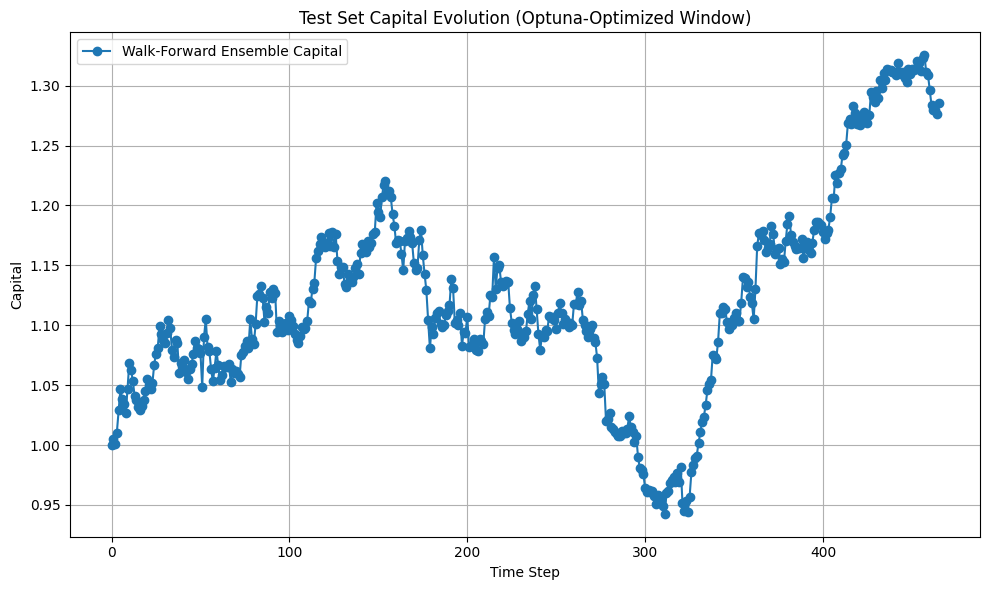

Saved updated file with ensemble predictions to: /notebooks/ticker_results/vz_merged_ensemble.csv


In [3]:
'''this cell runs an ensemble model to generate the final predictions'''
from models.ensemble_model_wrapper import ensemble_model_wrapper

tickers = ['all', 'amgn', 'bax', 'gs', 'pg', 'vz'] 
for tkr in tickers:
    filepath = f'/notebooks/{tkr}_merged.csv'
    ensemble_model_wrapper(filepath, default_model=None, retune_interval=30, n_splits = 5, n_trials = 25, init_train_size=.5, tkr=tkr)

Final Performance Differences (Predicted - Baseline):
  cnnlstmtrans_pred: 93.95 (9.76%)
  dlinear_pred: 79.28 (8.23%)
  linear_pred: -16.28 (-1.69%)
  rnn_pred: 35.12 (3.65%)
  xgboost_pred: -98.89 (-10.27%)
  EnsemblePrediction: 41.71 (4.33%)


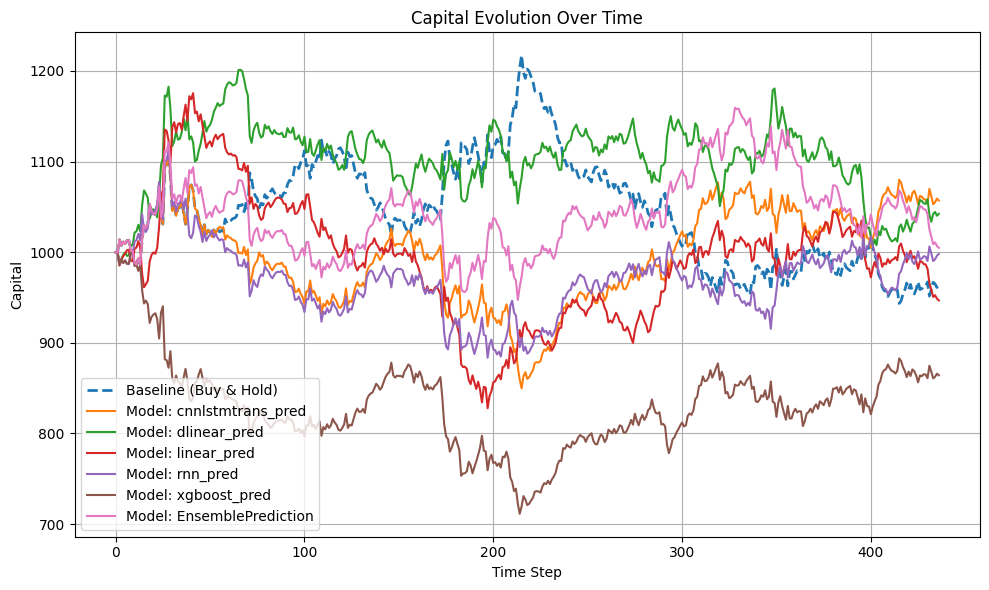

Final Performance Differences (Predicted - Baseline):
  cnnlstmtrans_pred: 327.85 (40.32%)
  dlinear_pred: 451.05 (55.47%)
  linear_pred: -104.86 (-12.90%)
  rnn_pred: 10.13 (1.25%)
  xgboost_pred: 547.71 (67.36%)
  EnsemblePrediction: 298.12 (36.67%)


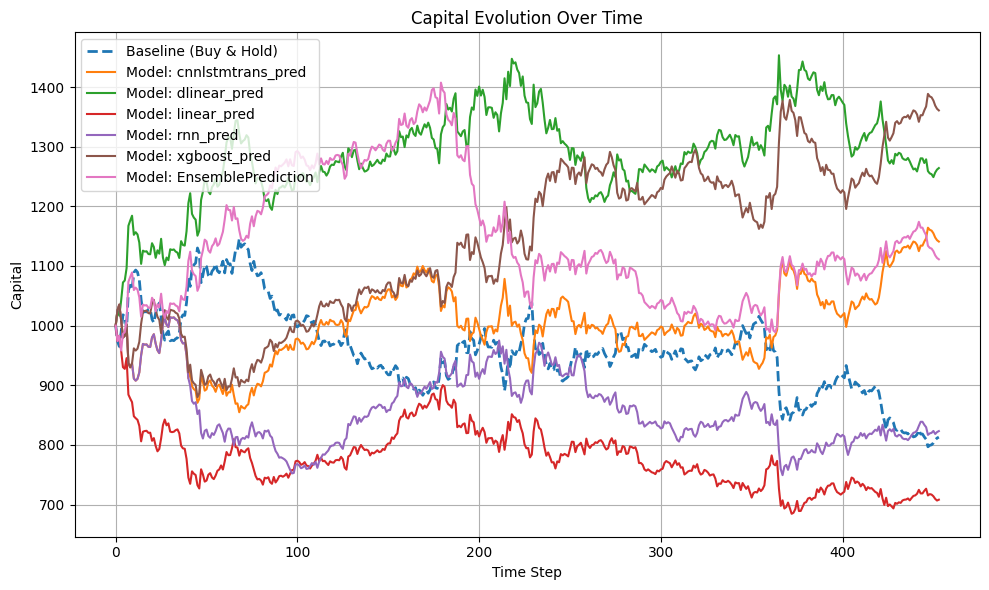

Final Performance Differences (Predicted - Baseline):
  cnnlstmtrans_pred: 415.96 (52.69%)
  dlinear_pred: 120.61 (15.28%)
  linear_pred: 522.67 (66.21%)
  rnn_pred: 419.68 (53.16%)
  xgboost_pred: 359.63 (45.55%)
  EnsemblePrediction: 1313.33 (166.36%)


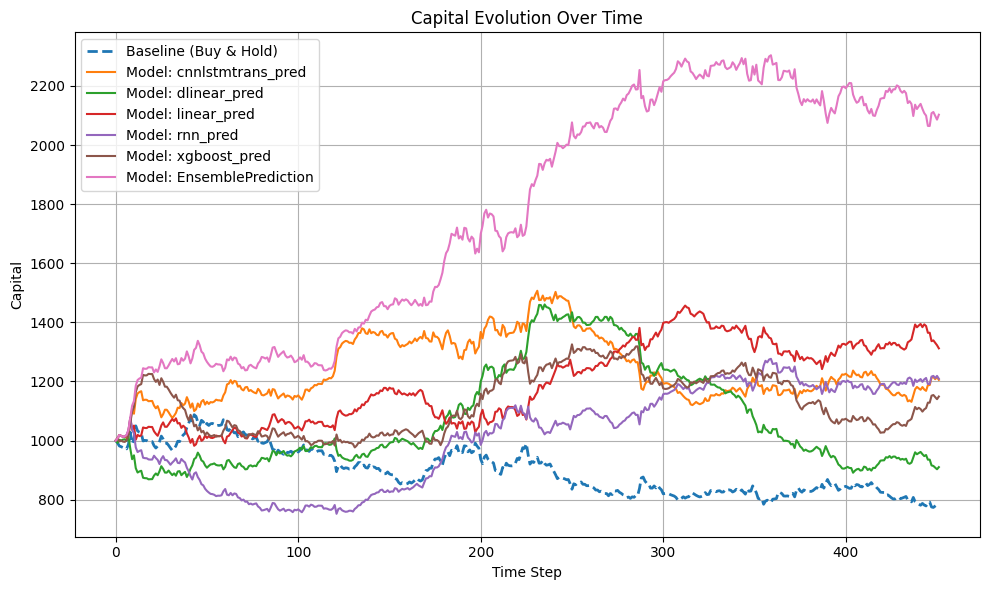

Final Performance Differences (Predicted - Baseline):
  cnnlstmtrans_pred: -284.06 (-25.78%)
  dlinear_pred: -242.68 (-22.02%)
  linear_pred: -106.29 (-9.65%)
  rnn_pred: -47.37 (-4.30%)
  xgboost_pred: -133.74 (-12.14%)
  EnsemblePrediction: -115.17 (-10.45%)


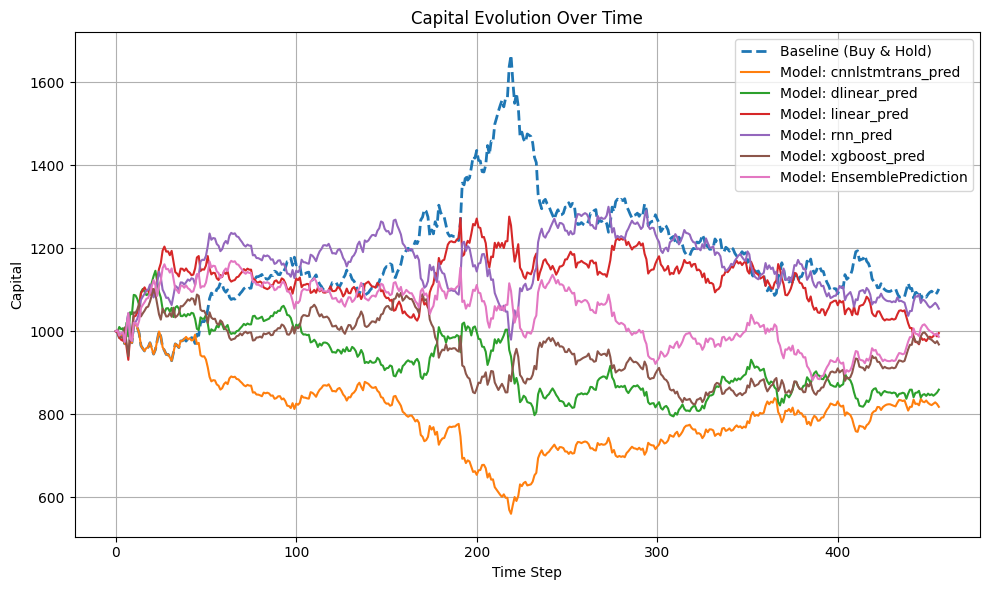

Final Performance Differences (Predicted - Baseline):
  cnnlstmtrans_pred: 263.83 (38.44%)
  dlinear_pred: 134.40 (19.58%)
  linear_pred: 703.66 (102.53%)
  rnn_pred: 158.21 (23.05%)
  xgboost_pred: 905.16 (131.88%)
  EnsemblePrediction: 789.67 (115.06%)


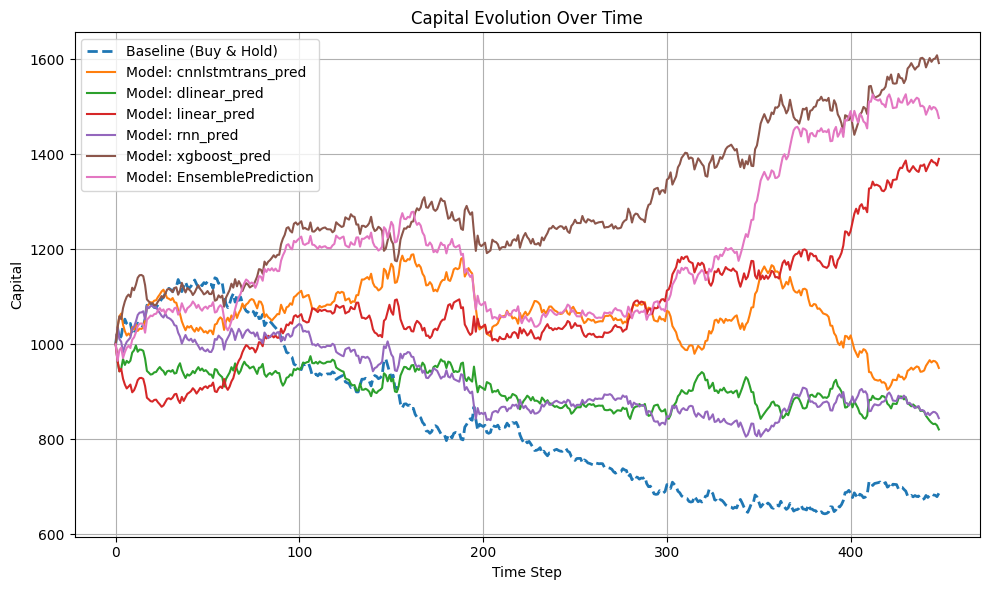

Final Performance Differences (Predicted - Baseline):
  cnnlstmtrans_pred: 83.99 (8.00%)
  dlinear_pred: -293.52 (-27.97%)
  linear_pred: 82.60 (7.87%)
  rnn_pred: -44.01 (-4.19%)
  xgboost_pred: -185.87 (-17.71%)
  EnsemblePrediction: 236.24 (22.51%)


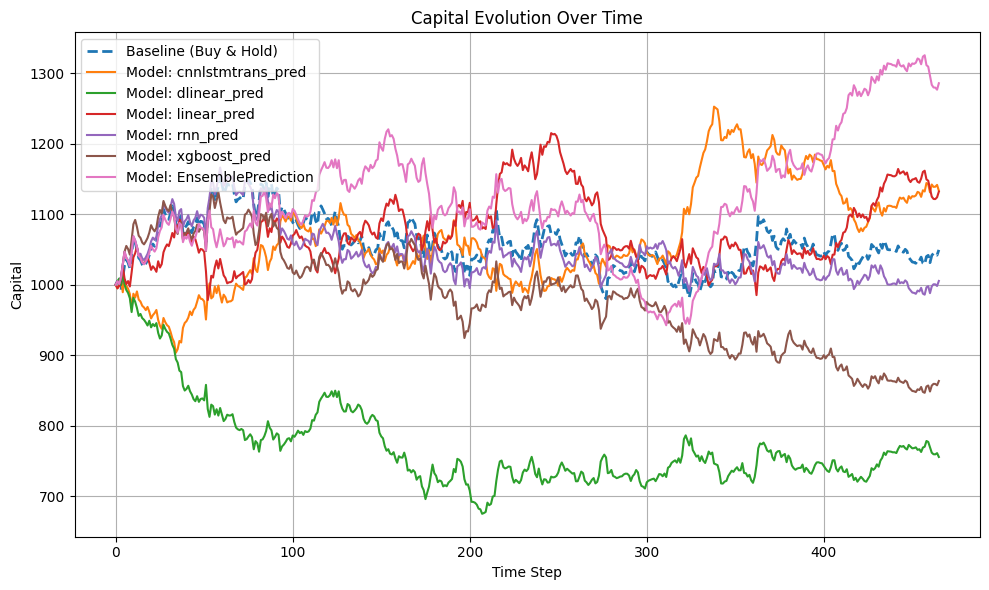

In [6]:
'''this cell plots the results of the predictions generated by the models''' 
import pandas as pd
import matplotlib.pyplot as plt

def calculate_and_plot_capital_from_file(regress_file_path, initial_capital=1000):
    # Read predictions and actual percent changes from the CSV file
    data = pd.read_csv(regress_file_path)
    
    # Assuming the "Actuals" column contains the actual percent changes,
    # all other columns are treated as different prediction models.
    prediction_columns = [col for col in data.columns if col != 'Actuals']
    actuals = data['Actuals'].values

    # Initialize the baseline capital evolution (always invested)
    baseline_capital = initial_capital
    baseline_capitals = [baseline_capital]
    
    # Initialize dictionaries to store current capital and evolution for each prediction model.
    model_capitals = {model: initial_capital for model in prediction_columns}
    model_capital_history = {model: [initial_capital] for model in prediction_columns}
    
    # Iterate through each time step
    for idx, actual in enumerate(actuals):
        # Update baseline capital: always invested (long position)
        baseline_capital *= (1 + actual)
        baseline_capitals.append(baseline_capital)
        
        # For each prediction model, update the capital based on its prediction signal.
        for model in prediction_columns:
            pred = data.loc[idx, model]
            # If the model predicts a positive return, go long.
            if pred > 0:
                model_capitals[model] *= (1 + actual)
            # If the model predicts a negative return, assume a short position.
            elif pred < 0:
                model_capitals[model] *= (1 - actual)
            # Else, no action: capital remains unchanged.
            # Append the updated capital to the model's history.
            model_capital_history[model].append(model_capitals[model])
    
    # Optionally, print out the final performance difference for each model relative to the baseline.
    print("Final Performance Differences (Predicted - Baseline):")
    for model in prediction_columns:
        diff = model_capitals[model] - baseline_capital
        diff_percentage = (diff / baseline_capital * 100) if baseline_capital != 0 else float('nan')
        print(f"  {model}: {diff:.2f} ({diff_percentage:.2f}%)")
    
    # Plot the capital evolution for baseline and each prediction model.
    plt.figure(figsize=(10, 6))
    plt.plot(baseline_capitals, label="Baseline (Buy & Hold)", linewidth=2, linestyle='--')
    for model in prediction_columns:
        plt.plot(model_capital_history[model], label=f"Model: {model}")
    
    plt.title("Capital Evolution Over Time")
    plt.xlabel("Time Step")
    plt.ylabel("Capital")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
regress_file_path = '/notebooks/ticker_results/all_merged_ensemble.csv'
calculate_and_plot_capital_from_file(regress_file_path)

regress_file_path = '/notebooks/ticker_results/amgn_merged_ensemble.csv'
calculate_and_plot_capital_from_file(regress_file_path)

regress_file_path = '/notebooks/ticker_results/bax_merged_ensemble.csv'
calculate_and_plot_capital_from_file(regress_file_path)

regress_file_path = '/notebooks/ticker_results/gs_merged_ensemble.csv'
calculate_and_plot_capital_from_file(regress_file_path)

regress_file_path = '/notebooks/ticker_results/pg_merged_ensemble.csv'
calculate_and_plot_capital_from_file(regress_file_path)

regress_file_path = '/notebooks/ticker_results/vz_merged_ensemble.csv'
calculate_and_plot_capital_from_file(regress_file_path)



